In [1]:
#!pip3 install kaggle

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from kaggle.api.kaggle_api_extended import KaggleApi
#from ydata_profiling import ProfileReport
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import levene

In [3]:
api = KaggleApi()
api.authenticate()

# Define dataset and destination
dataset_url = 'altruistdelhite04/loan-prediction-problem-dataset'
download_path = 'datasets/altruistdelhite04/loan-prediction-problem-dataset'  # Specify destination folder

# Download dataset
api.dataset_download_files(dataset_url, path=download_path, unzip=True)

print(f"Dataset downloaded to: {os.path.abspath(download_path)}")

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
Dataset downloaded to: C:\AI DS\DS2\datasets\altruistdelhite04\loan-prediction-problem-dataset


Dataset loaded successfully!
Shape: (614, 13)
COMPREHENSIVE EDA REPORT
BASIC DATASET INFORMATION
Dataset Shape: (614, 13)
Number of Features: 13
Number of Records: 614

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-nu

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Last 5 rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


MISSING VALUES ANALYSIS
Columns with missing values:


,Column,Missing_Count,Missing_Percentage
10,Credit_History,50,8.143322
5,Self_Employed,32,5.211726
8,LoanAmount,22,3.583062
3,Dependents,15,2.442997
9,Loan_Amount_Term,14,2.280130
1,Gender,13,2.117264
2,Married,3,0.488599


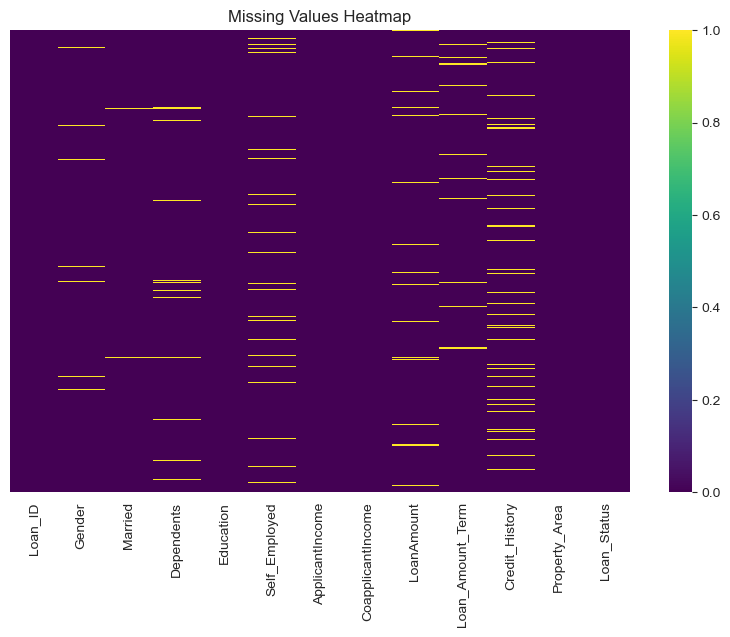

NUMERICAL FEATURES ANALYSIS
Descriptive Statistics:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


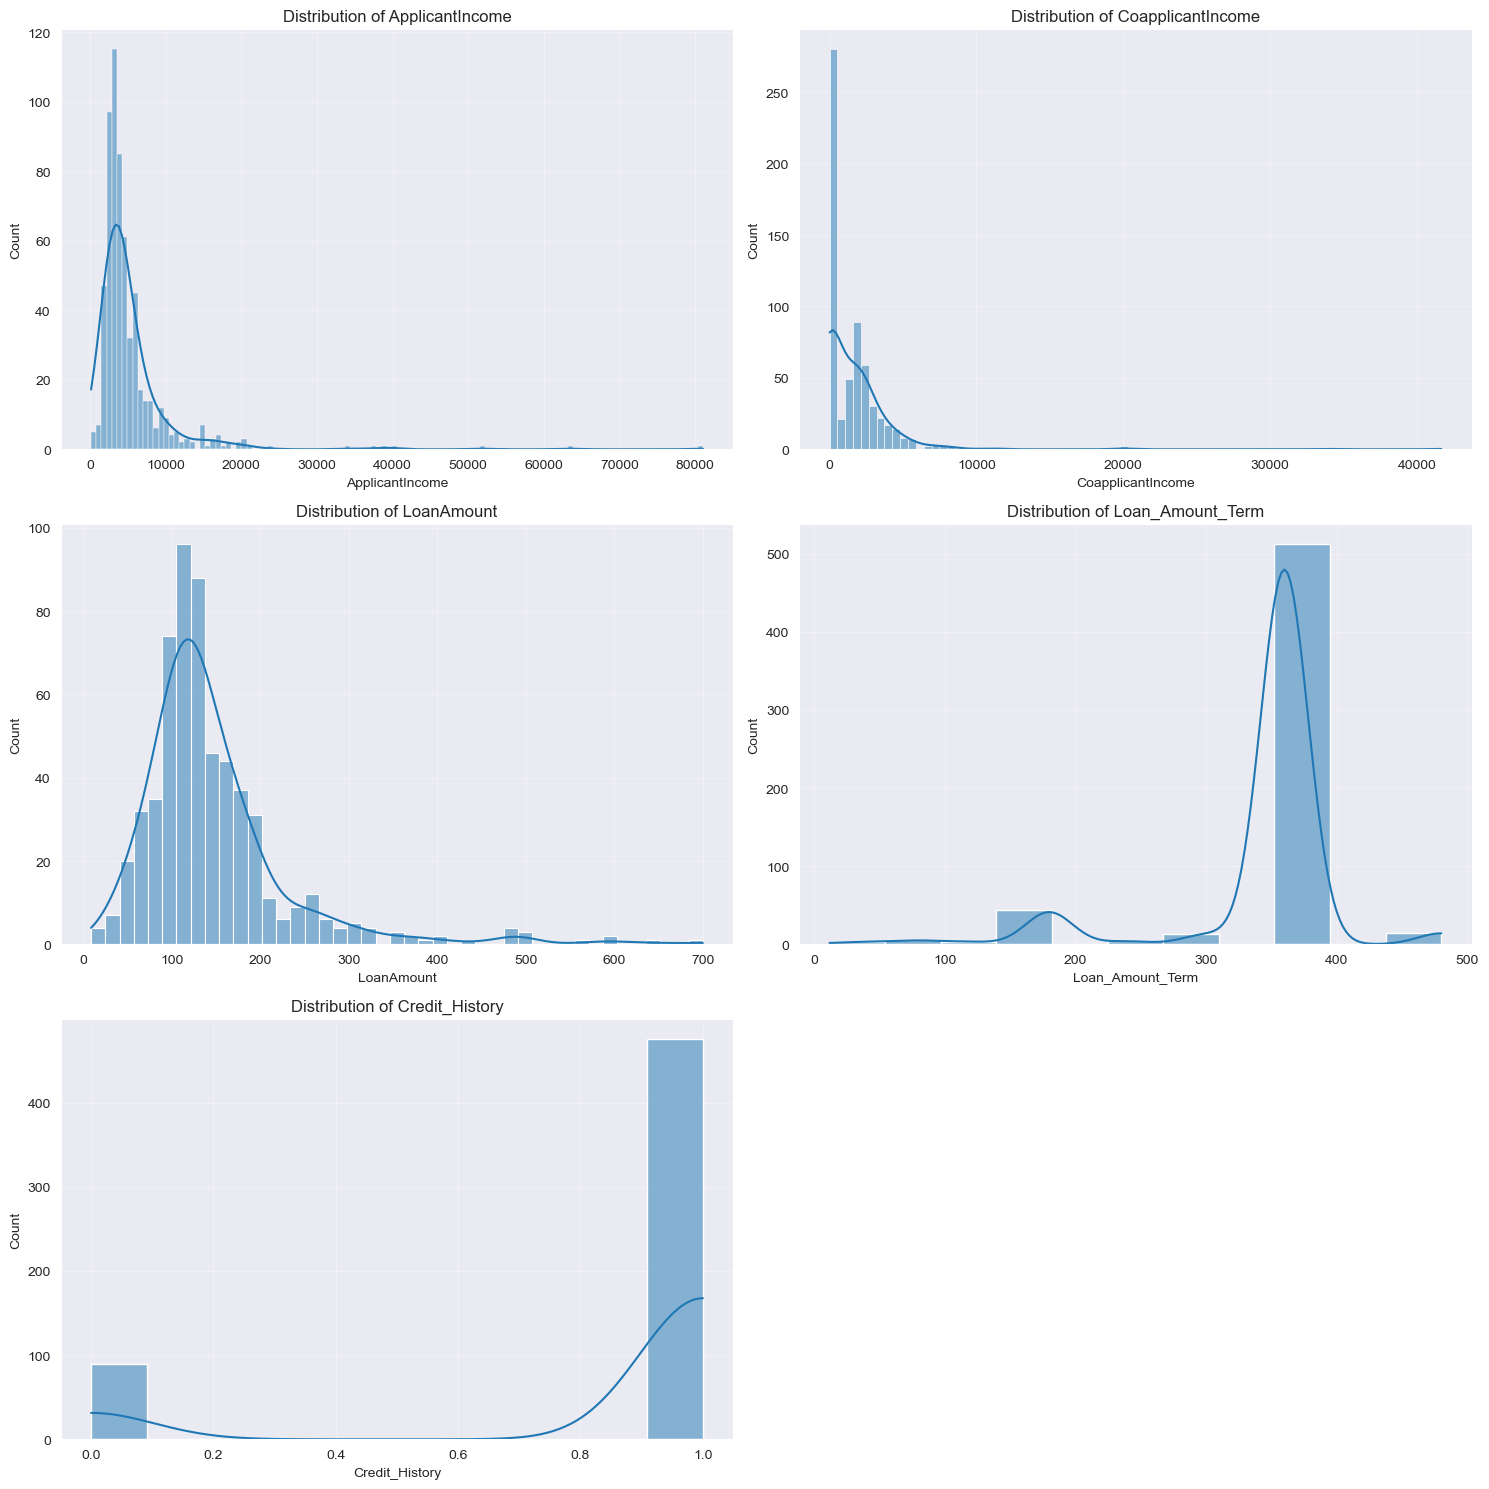

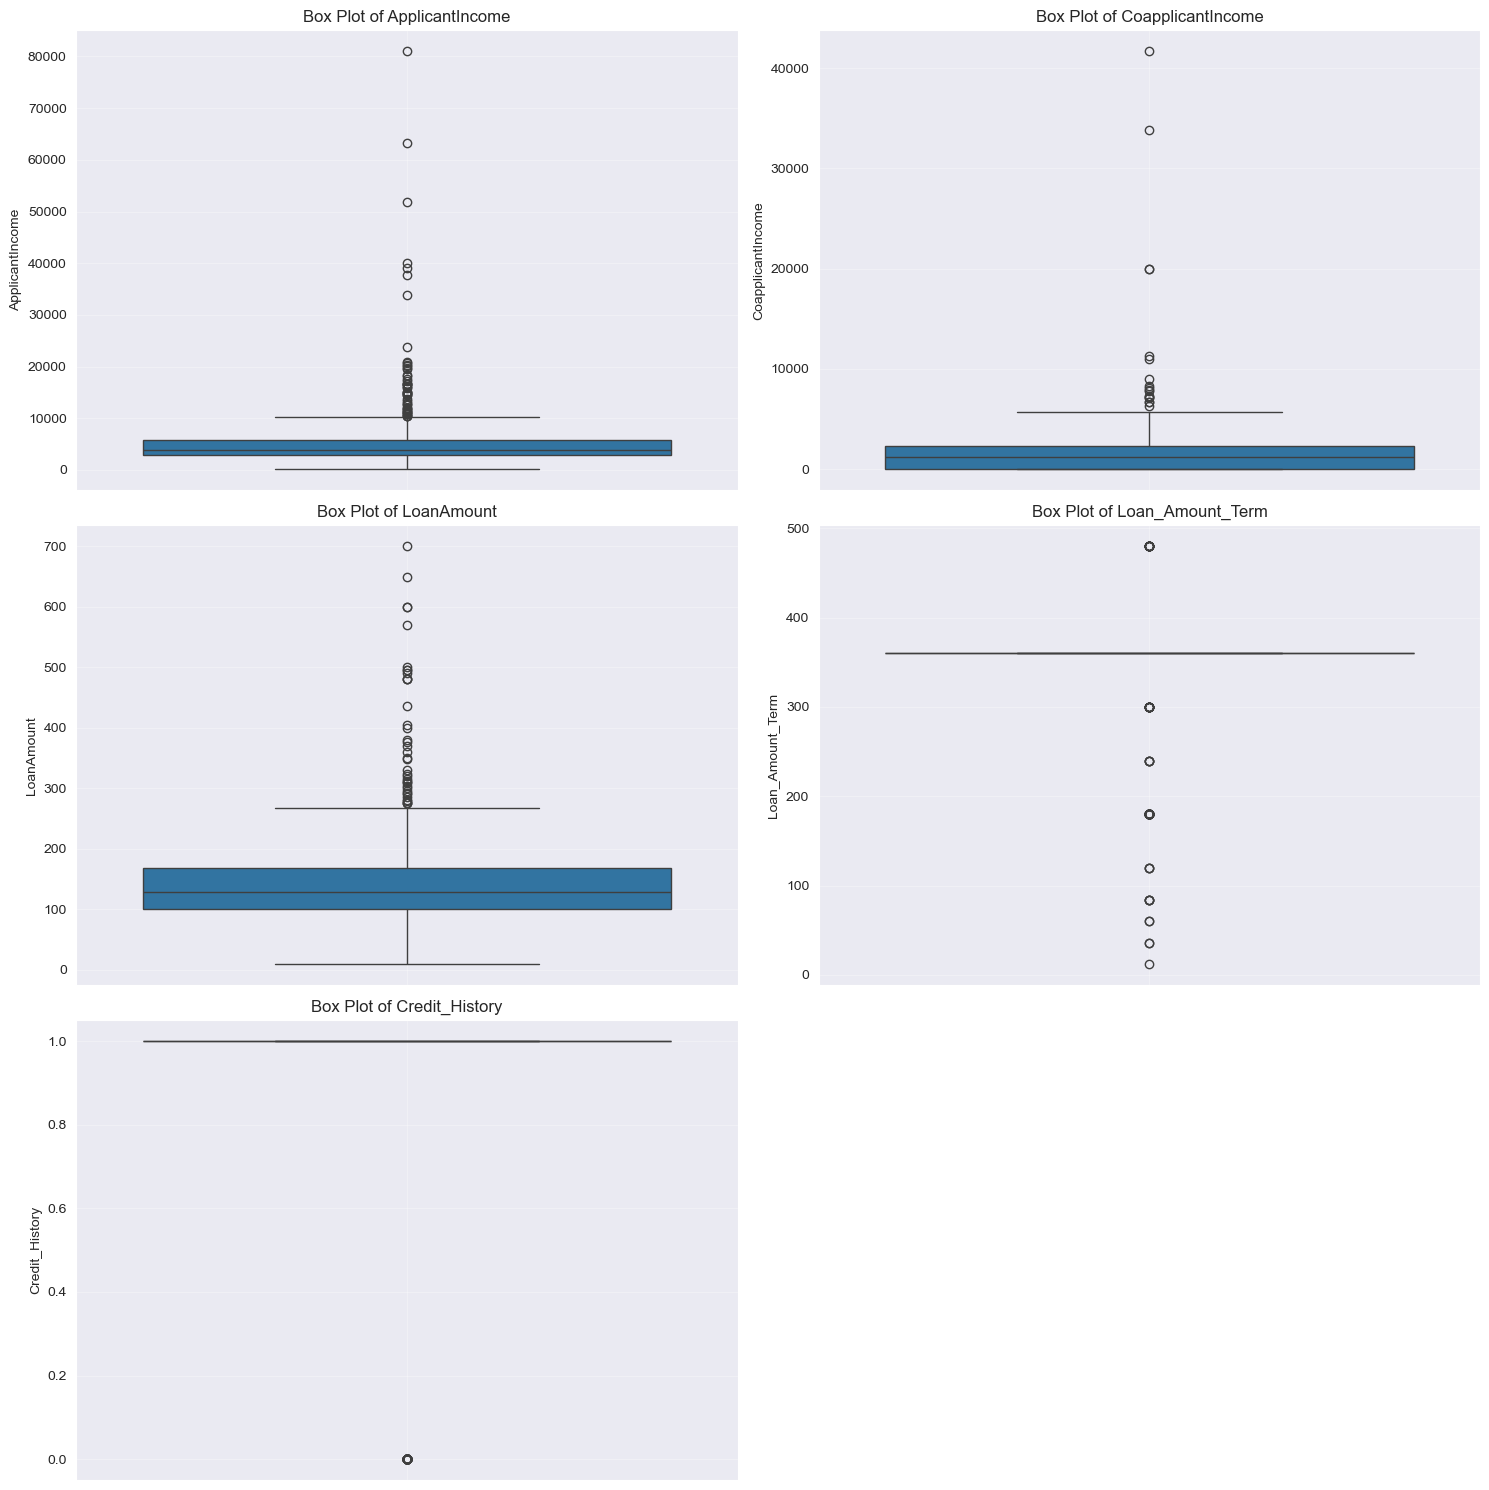

CATEGORICAL FEATURES ANALYSIS

Loan_ID - Value Counts:


,Count,Percentage
Loan_ID,,
LP001002,1,0.16
LP002328,1,0.16
LP002305,1,0.16
LP002308,1,0.16
LP002314,1,0.16
...,...,...
LP001692,1,0.16
LP001693,1,0.16
LP001698,1,0.16



Gender - Value Counts:


,Count,Percentage
Gender,,
Male,489,79.64
Female,112,18.24
NaN,13,2.12



Married - Value Counts:


,Count,Percentage
Married,,
Yes,398,64.82
No,213,34.69
NaN,3,0.49



Dependents - Value Counts:


,Count,Percentage
Dependents,,
0,345,56.19
1,102,16.61
2,101,16.45
3+,51,8.31
NaN,15,2.44



Education - Value Counts:


,Count,Percentage
Education,,
Graduate,480,78.18
Not Graduate,134,21.82



Self_Employed - Value Counts:


,Count,Percentage
Self_Employed,,
No,500,81.43
Yes,82,13.36
NaN,32,5.21



Property_Area - Value Counts:


,Count,Percentage
Property_Area,,
Semiurban,233,37.95
Urban,202,32.90
Rural,179,29.15


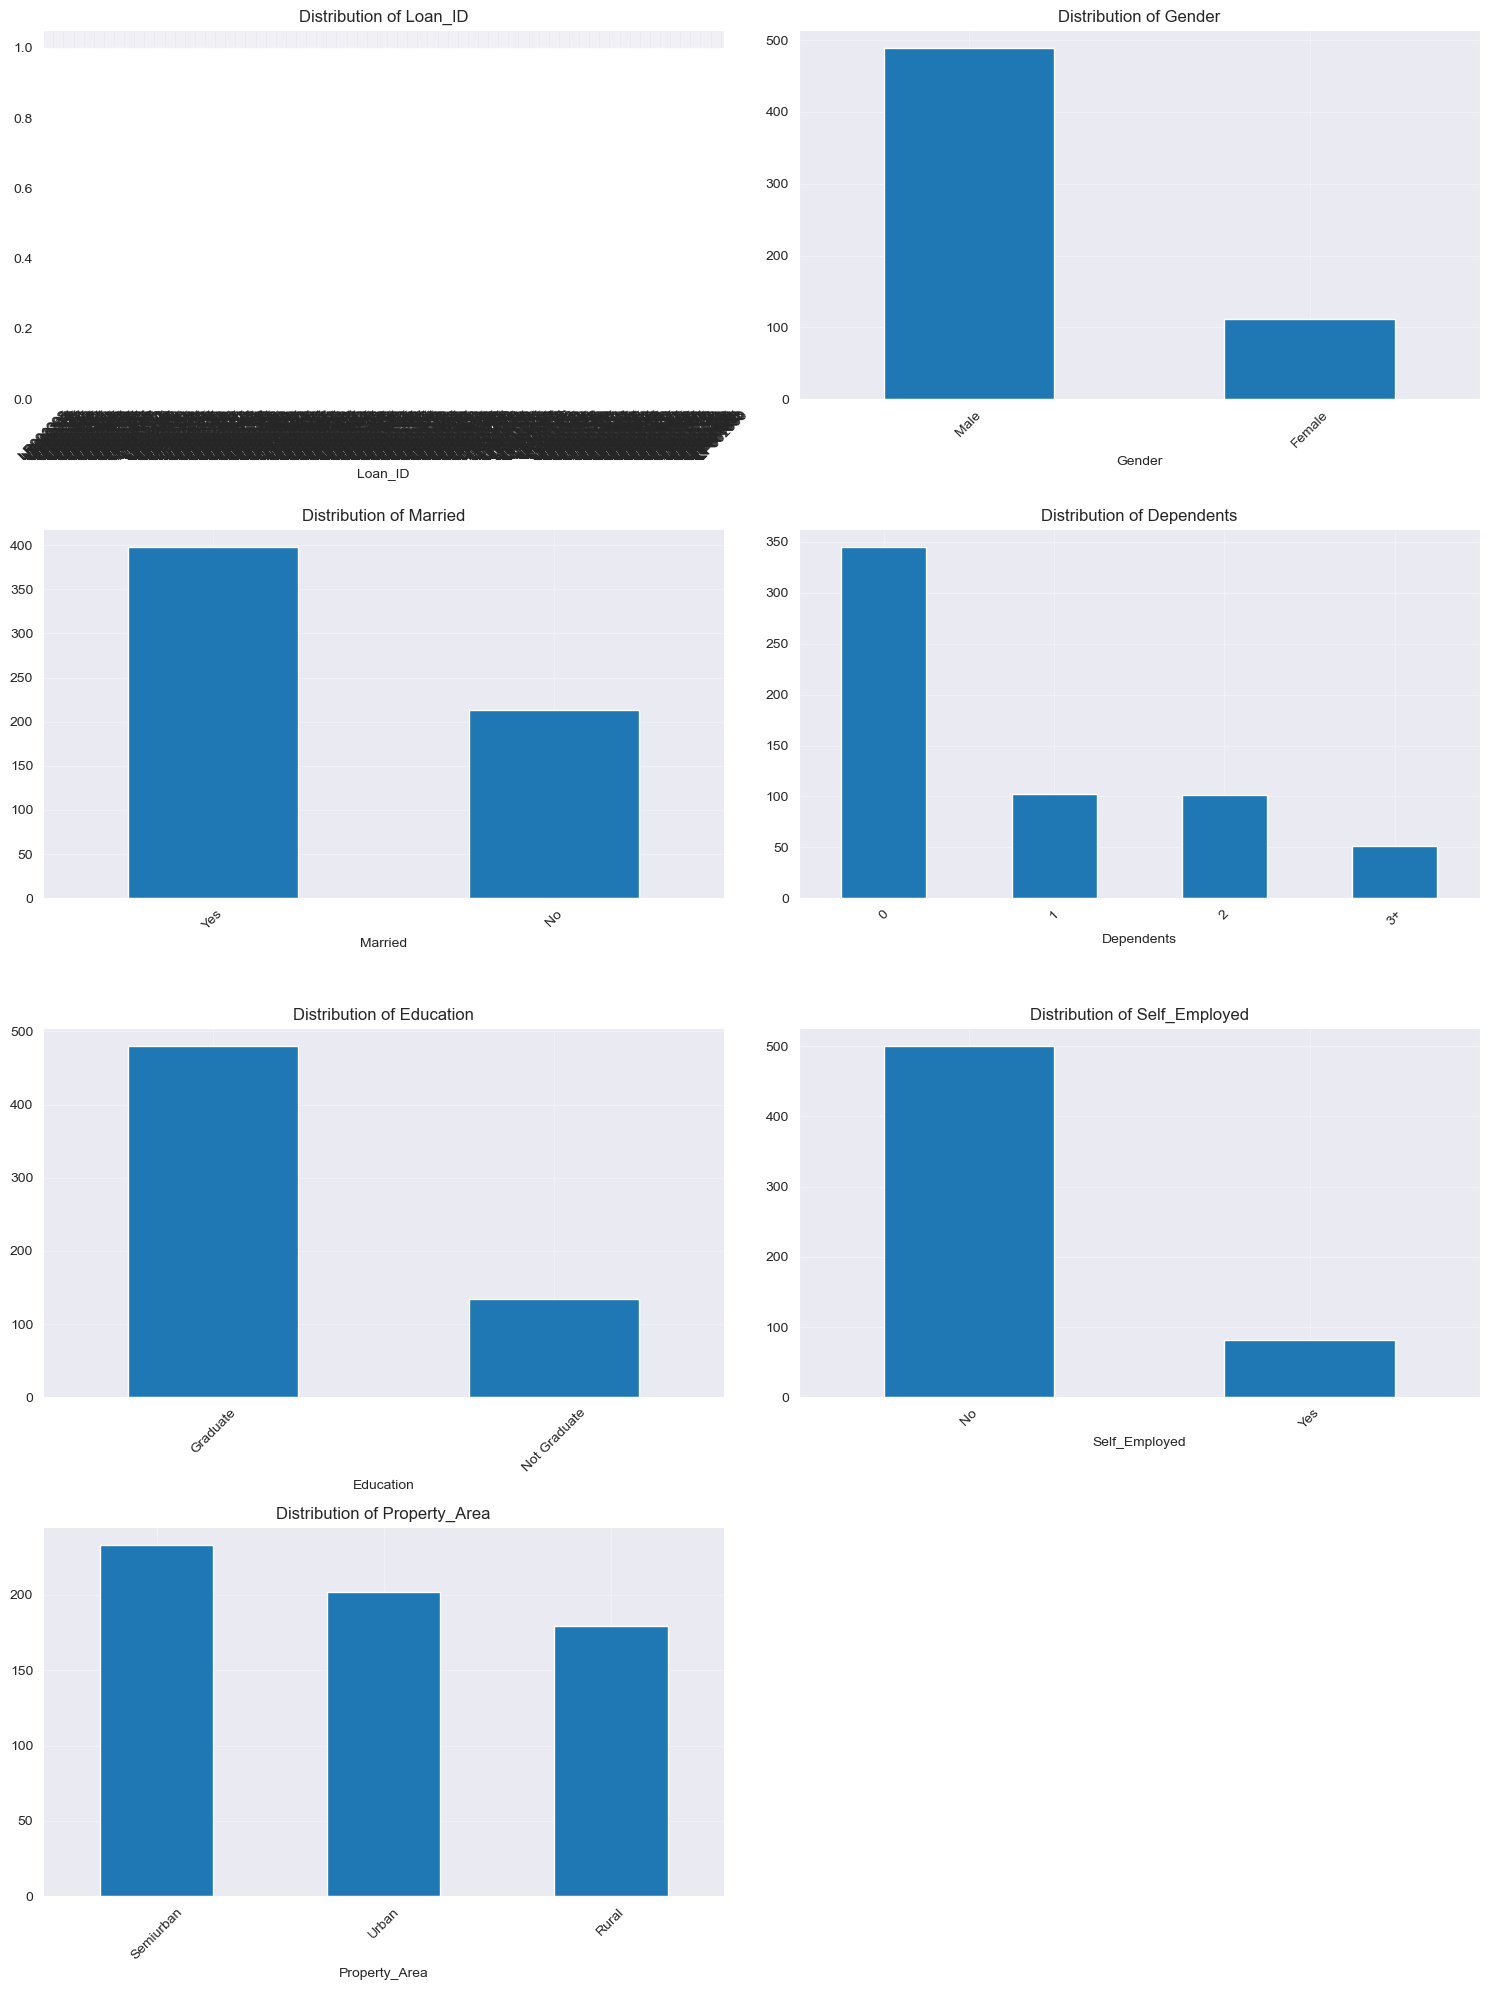

TARGET VARIABLE ANALYSIS
Target Variable: Loan_Status


,Count,Percentage
Loan_Status,,
Y,422,68.73
N,192,31.27


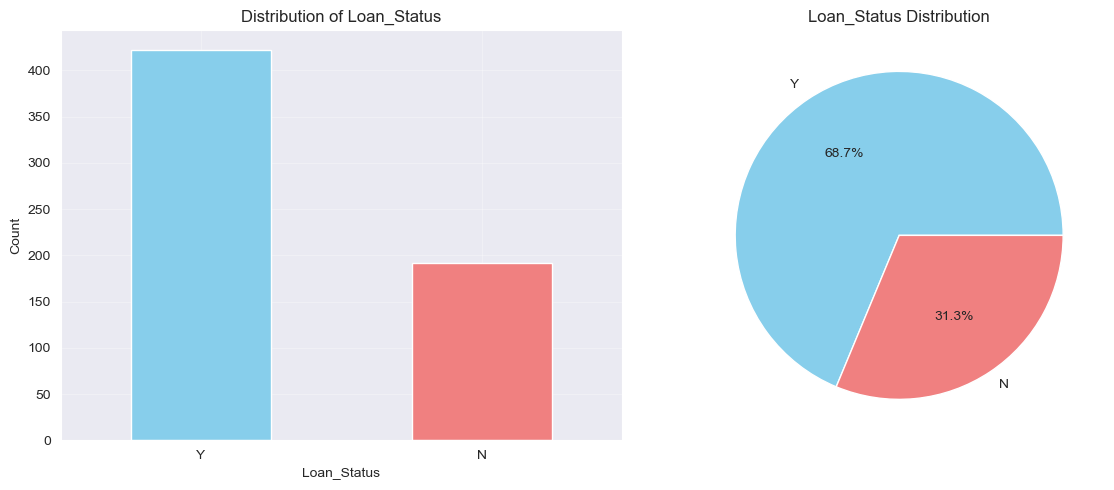

CORRELATION ANALYSIS
Correlation Matrix:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000,-0.117,0.571,-0.045,-0.015
CoapplicantIncome,-0.117,1.000,0.189,-0.060,-0.002
LoanAmount,0.571,0.189,1.000,0.039,-0.008
Loan_Amount_Term,-0.045,-0.060,0.039,1.000,0.001
Credit_History,-0.015,-0.002,-0.008,0.001,1.000


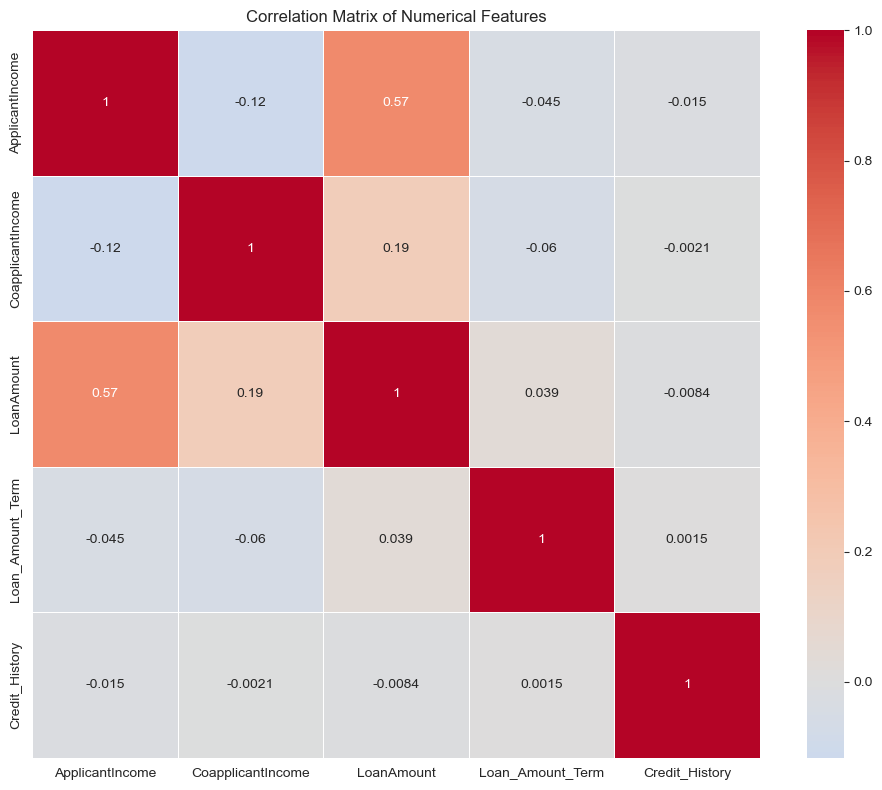


Highly Correlated Feature Pairs (|correlation| > 0.5):


,Feature_1,Feature_2,Correlation
0,ApplicantIncome,LoanAmount,0.571


BIVARIATE ANALYSIS WITH TARGET
Numerical Features vs Target:

ApplicantIncome by Loan_Status:


,count,mean,median,std
Loan_Status,,,,
N,192,5446.08,3833.5,6819.56
Y,422,5384.07,3812.5,5765.44



CoapplicantIncome by Loan_Status:


,count,mean,median,std
Loan_Status,,,,
N,192,1877.81,268.0,4384.06
Y,422,1504.52,1239.5,1924.75



LoanAmount by Loan_Status:


,count,mean,median,std
Loan_Status,,,,
N,181,151.22,129.0,85.86
Y,411,144.29,126.0,85.48



Loan_Amount_Term by Loan_Status:


,count,mean,median,std
Loan_Status,,,,
N,186,344.06,360.0,69.24
Y,414,341.07,360.0,63.25



Credit_History by Loan_Status:


,count,mean,median,std
Loan_Status,,,,
N,179,0.54,1.0,0.50
Y,385,0.98,1.0,0.13


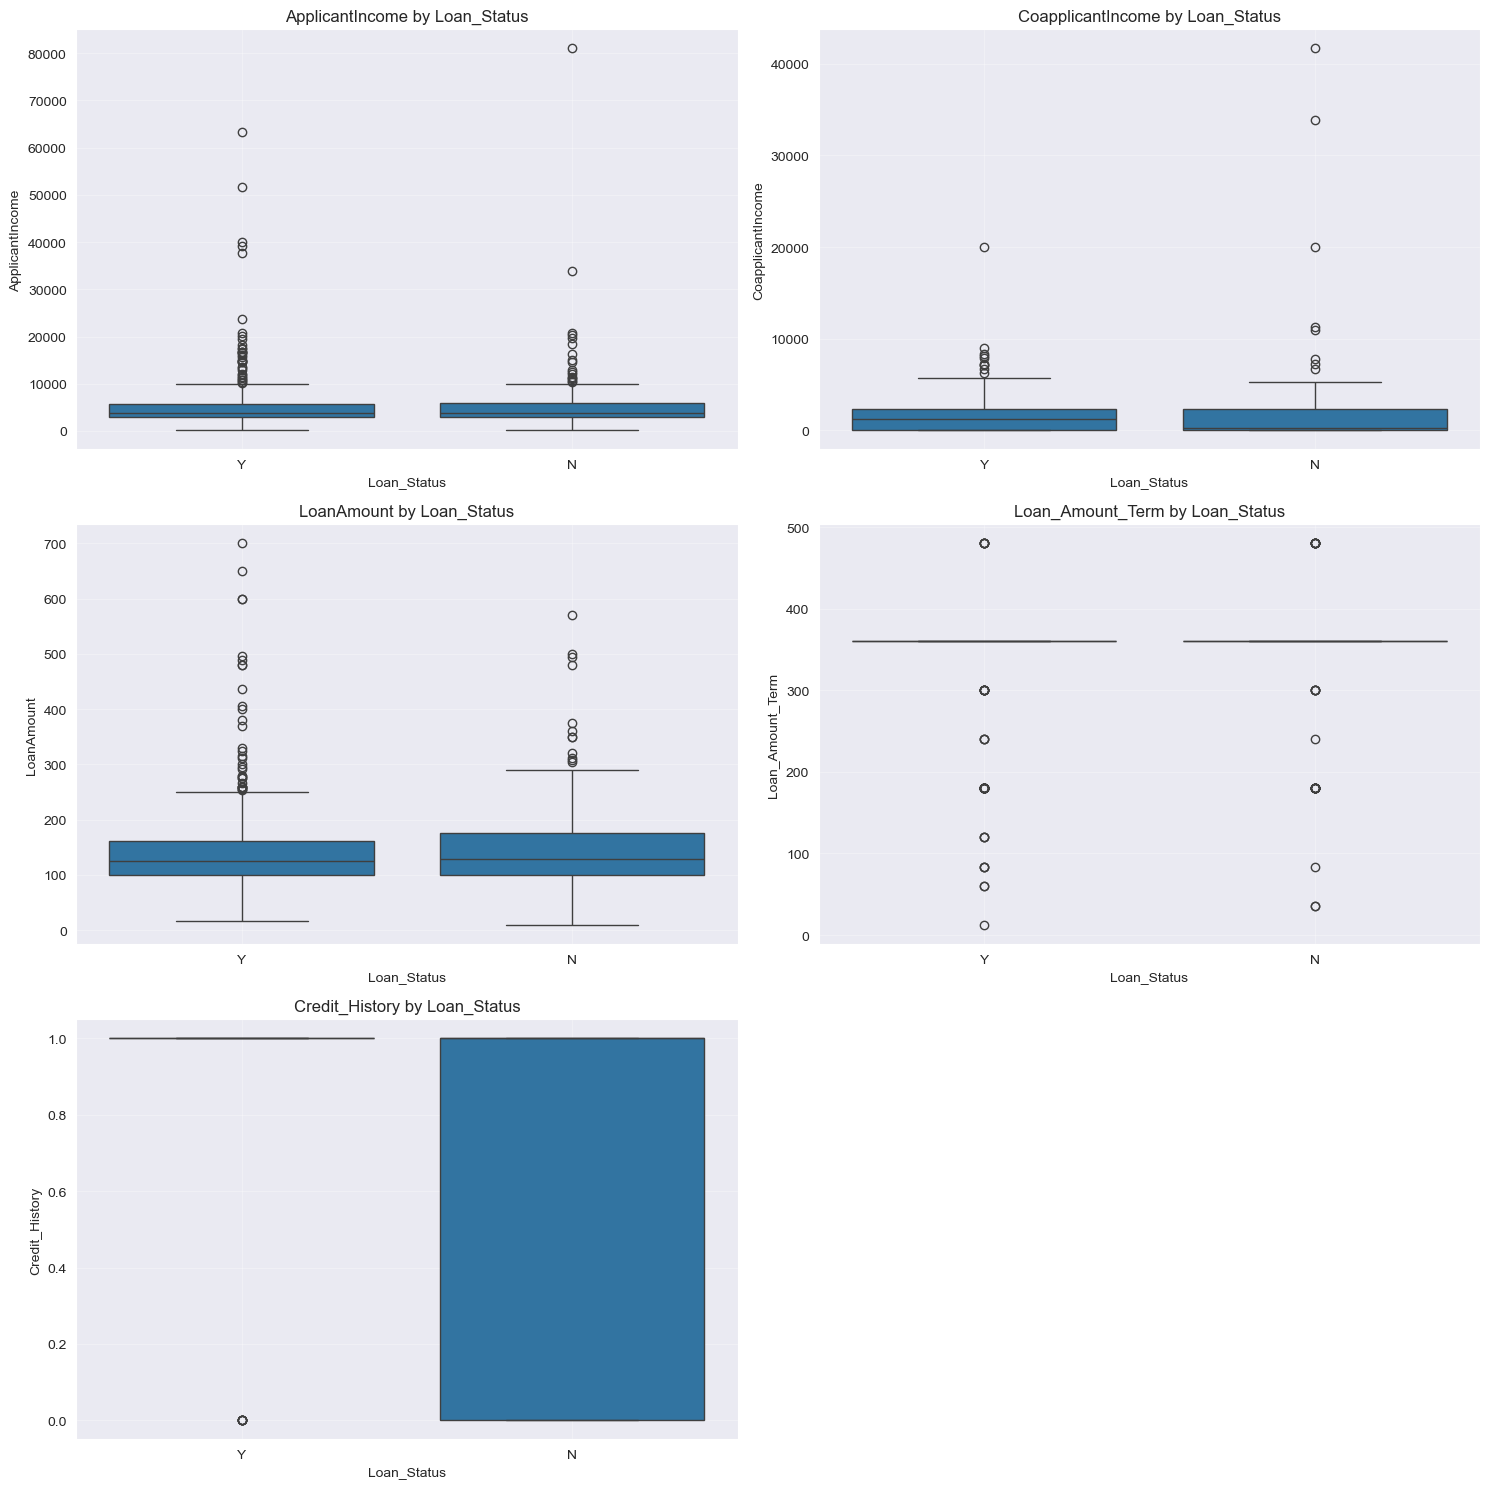


Categorical Features vs Target:

Loan_ID vs Loan_Status - Cross Tabulation:


Loan_Status,N,Y,All
Loan_ID,,,
LP001002,0,1,1
LP001003,1,0,1
LP001005,0,1,1
LP001006,0,1,1
LP001008,0,1,1
...,...,...,...
LP002979,0,1,1
LP002983,0,1,1
LP002984,0,1,1



Loan_ID vs Loan_Status - Percentage Distribution:


Loan_Status,N,Y
Loan_ID,,
LP001002,0.0,100.0
LP001003,100.0,0.0
LP001005,0.0,100.0
LP001006,0.0,100.0
LP001008,0.0,100.0
...,...,...
LP002978,0.0,100.0
LP002979,0.0,100.0
LP002983,0.0,100.0



Gender vs Loan_Status - Cross Tabulation:


Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601



Gender vs Loan_Status - Percentage Distribution:


Loan_Status,N,Y
Gender,,
Female,33.04,66.96
Male,30.67,69.33



Married vs Loan_Status - Cross Tabulation:


Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611



Married vs Loan_Status - Percentage Distribution:


Loan_Status,N,Y
Married,,
No,37.09,62.91
Yes,28.39,71.61



Dependents vs Loan_Status - Cross Tabulation:


Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599



Dependents vs Loan_Status - Percentage Distribution:


Loan_Status,N,Y
Dependents,,
0,31.01,68.99
1,35.29,64.71
2,24.75,75.25
3+,35.29,64.71



Education vs Loan_Status - Cross Tabulation:


Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614



Education vs Loan_Status - Percentage Distribution:


Loan_Status,N,Y
Education,,
Graduate,29.17,70.83
Not Graduate,38.81,61.19



Self_Employed vs Loan_Status - Cross Tabulation:


Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582



Self_Employed vs Loan_Status - Percentage Distribution:


Loan_Status,N,Y
Self_Employed,,
No,31.40,68.60
Yes,31.71,68.29



Property_Area vs Loan_Status - Cross Tabulation:


Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614



Property_Area vs Loan_Status - Percentage Distribution:


Loan_Status,N,Y
Property_Area,,
Rural,38.55,61.45
Semiurban,23.18,76.82
Urban,34.16,65.84


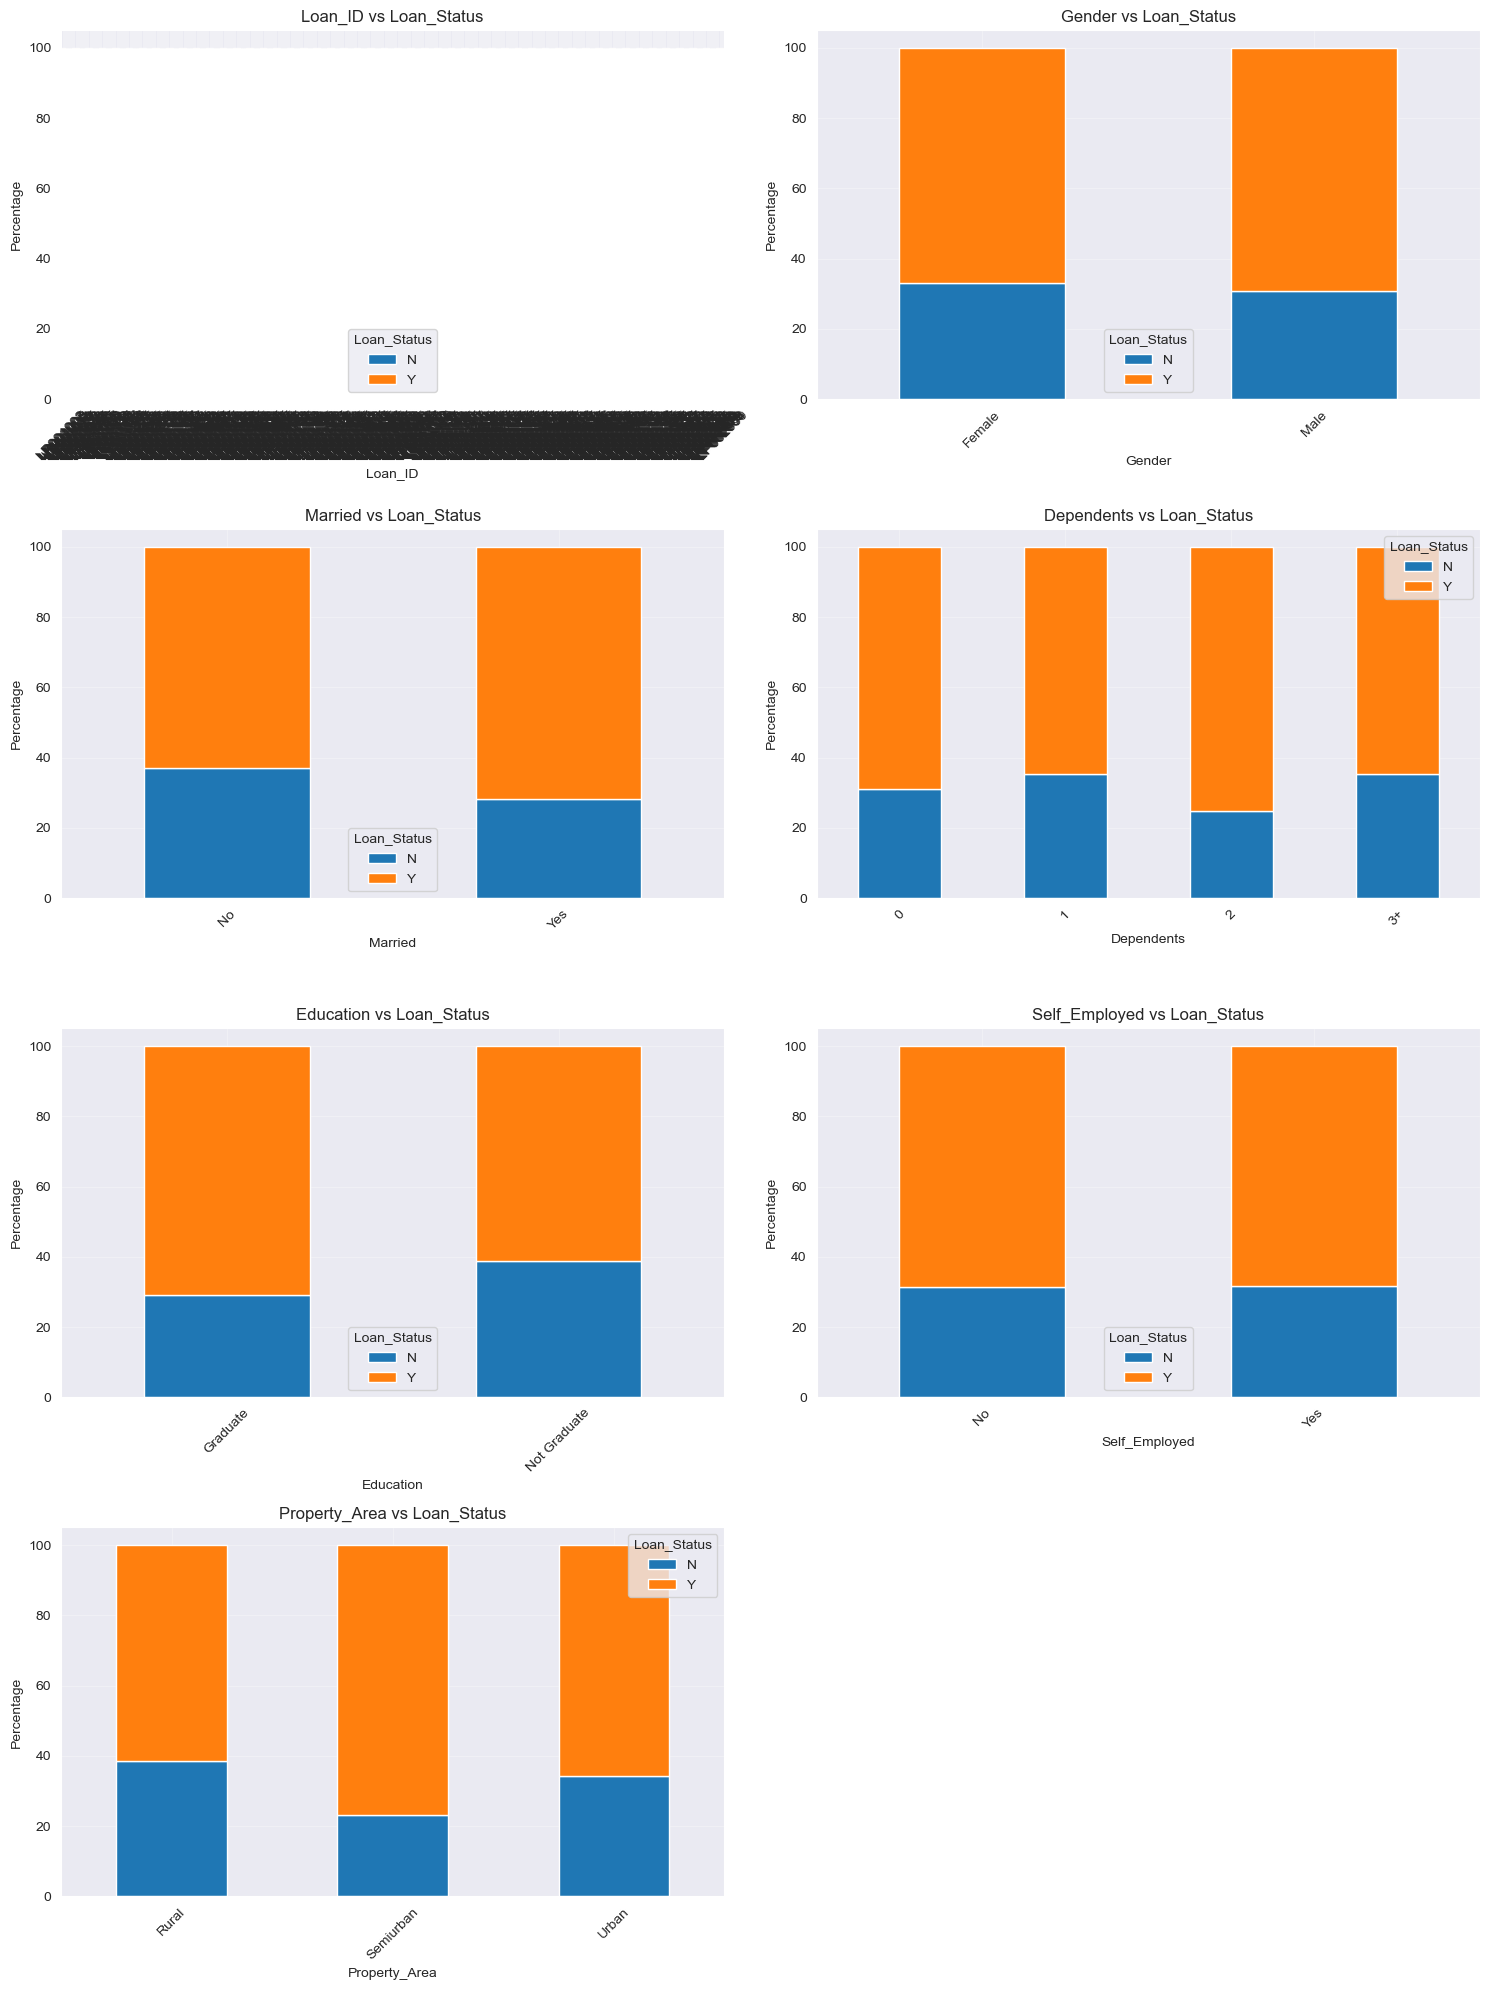

OUTLIER ANALYSIS


,Feature,Outlier_Count,Outlier_Percentage,Lower_Bound,Upper_Bound
0,ApplicantIncome,50,8.14,-1498.75,10171.25
1,CoapplicantIncome,18,2.93,-3445.88,5743.12
2,LoanAmount,39,6.35,-2.00,270.00
3,Loan_Amount_Term,88,14.33,360.00,360.00
4,Credit_History,89,14.50,1.00,1.00


EDA REPORT COMPLETED


In [2]:
from LoanDatasetEDA import LoanDatasetEDA

# Your current code (which is correct for creating the instance)
dataset_file = 'datasets/altruistdelhite04/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv'
eda = LoanDatasetEDA(dataset_file)

# Instead of 'eda.ge', use the complete method name:
eda.generate_full_report()

In [4]:
from LoanPredictionML import LoanPredictionML

# Initialize the ML pipeline
ml_pipeline = LoanPredictionML(
    train_path='datasets/altruistdelhite04/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv',
    test_path='datasets/altruistdelhite04/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv'
)

# Run the complete pipeline
# Step-by-step execution
# ml_pipeline.data_preprocessing()           # Handle missing values, encoding
# ml_pipeline.train_models()                # Train multiple models
# best_model = ml_pipeline.model_comparison() # Compare and select best model
# ml_pipeline.detailed_evaluation()         # Detailed metrics and visualizations
# ml_pipeline.feature_importance()          # See which features matter most
# ml_pipeline.hyperparameter_tuning('Random Forest')  # Optimize best model
# predictions = ml_pipeline.generate_predictions()    # Generate final predictions

Training data loaded: (614, 13)
Test data loaded: (367, 12)
Data preparation completed!
Training features shape: (614, 11)
Training target shape: (614,)
Test features shape: (367, 11)


In [5]:
ml_pipeline.data_preprocessing()           # Handle missing values, encoding

DATA PREPROCESSING
Missing values before preprocessing:
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

Missing values after preprocessing:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Preprocessing completed!
Processed training features shape: (614, 11)
Processed test features shape: (367, 11)


In [6]:
ml_pipeline.train_models()                # Train multiple models

MODEL TRAINING & EVALUATION
Models initialized:
- Logistic Regression
- Random Forest
- Gradient Boosting
- SVM
- Naive Bayes

Training Logistic Regression...
Cross-validation: 0.8046 (+/- 0.0523)
Validation accuracy: 0.8618

Training Random Forest...
Cross-validation: 0.7867 (+/- 0.0504)
Validation accuracy: 1.0000

Training Gradient Boosting...
Cross-validation: 0.7801 (+/- 0.0705)
Validation accuracy: 0.9187

Training SVM...
Cross-validation: 0.8029 (+/- 0.0387)
Validation accuracy: 0.8618

Training Naive Bayes...
Cross-validation: 0.7932 (+/- 0.0583)
Validation accuracy: 0.8455


MODEL COMPARISON
Model Performance Comparison:
                     cv_mean  cv_std  val_accuracy
Logistic Regression   0.8046  0.0261        0.8618
SVM                   0.8029  0.0194        0.8618
Naive Bayes           0.7932  0.0292        0.8455
Random Forest         0.7867  0.0252        1.0000
Gradient Boosting     0.7801  0.0353        0.9187


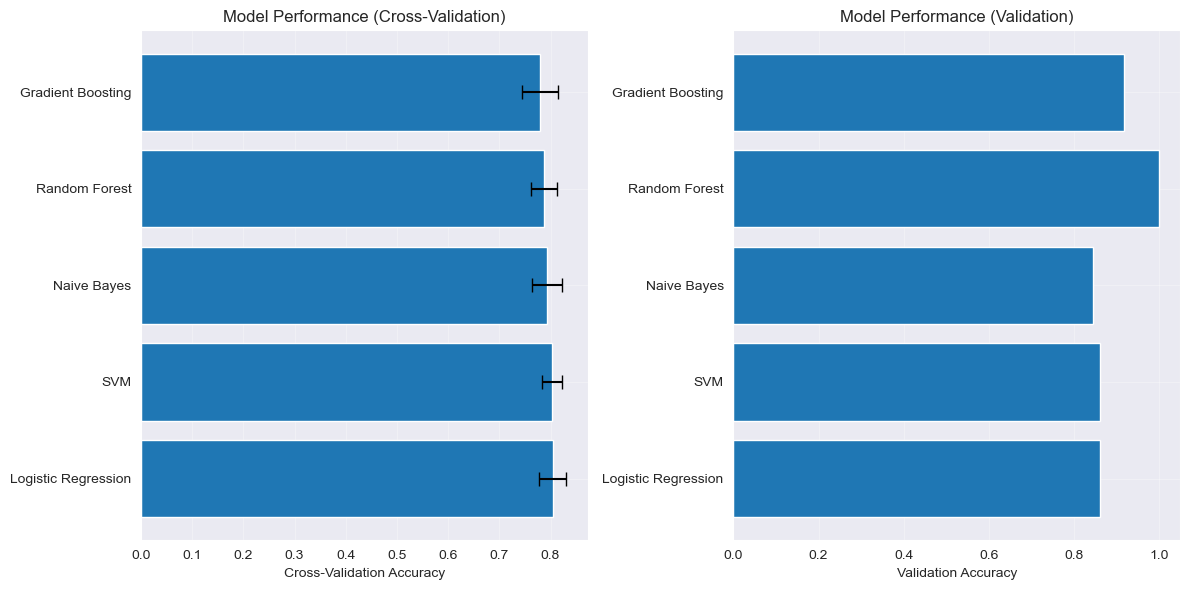


Best Model: Logistic Regression
Best CV Score: 0.8046


In [7]:
best_model = ml_pipeline.model_comparison() # Compare and select best model

MODEL COMPARISON
Model Performance Comparison:
                     cv_mean  cv_std  val_accuracy
Logistic Regression   0.8046  0.0261        0.8618
SVM                   0.8029  0.0194        0.8618
Naive Bayes           0.7932  0.0292        0.8455
Random Forest         0.7867  0.0252        1.0000
Gradient Boosting     0.7801  0.0353        0.9187


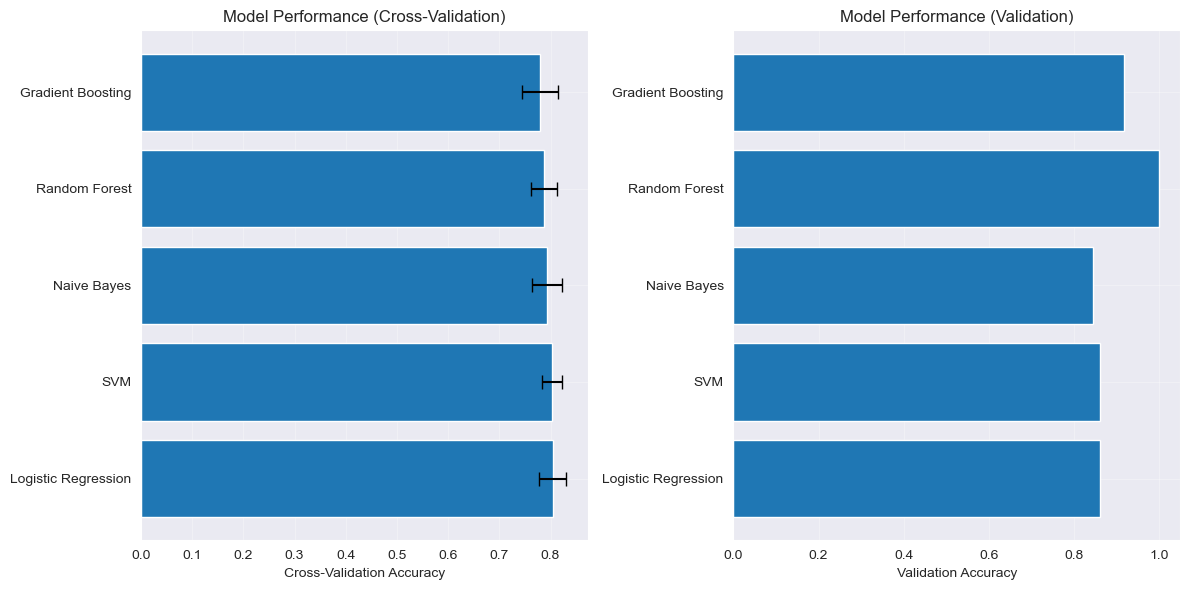


Best Model: Logistic Regression
Best CV Score: 0.8046
DETAILED EVALUATION: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           N       0.96      0.58      0.72        38
           Y       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



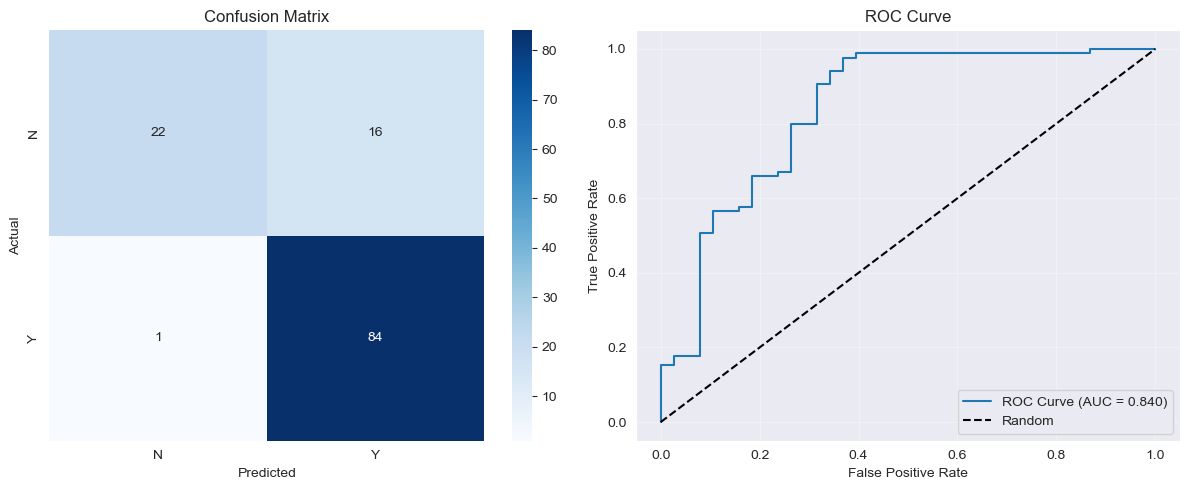

0.839938080495356

In [8]:
ml_pipeline.detailed_evaluation()         # Detailed metrics and visualizations

In [9]:
ml_pipeline.feature_importance()          # See which features matter most

Feature importance not available for Logistic Regression


In [10]:
ml_pipeline.hyperparameter_tuning('Random Forest')  # Optimize best model

HYPERPARAMETER TUNING: Random Forest
Parameter Grid:
  n_estimators: [100, 200, 300]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]

Total parameter combinations to test: 81
With 5-fold CV, total model fits: 405

Starting Grid Search...
------------------------------
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Grid Search completed in 11.14 seconds
HYPERPARAMETER TUNING RESULTS
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8111
Best validation std: 0.0282

Top 10 Parameter Combinations:
                                                                                 params  mean_test_score  std_test_score  rank_test_score
  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}         0.811102        0.028179                1
  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators':

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [11]:
predictions = ml_pipeline.generate_predictions()    # Generate final predictions

GENERATING PREDICTIONS: Random Forest_Tuned
Prediction Summary:
Loan_Status
Y    308
N     59
Name: count, dtype: int64

Approval Rate: 83.92%

Predictions saved to 'loan_predictions.csv'


GOODNESS OF FIT EVALUATION: Random Forest

📊 CORE CLASSIFICATION METRICS
----------------------------------------
Accuracy:           1.0000
Precision:          1.0000
Recall:             1.0000
F1-Score:           1.0000

📈 CONFUSION MATRIX METRICS
----------------------------------------
True Positives:     85
True Negatives:     38
False Positives:    0
False Negatives:    0
Sensitivity (TPR):  1.0000
Specificity (TNR):  1.0000

🎯 ADVANCED METRICS
----------------------------------------
ROC AUC:            1.0000
Average Precision:  1.0000
Matthews Coeff:     1.0000
Cohen's Kappa:      1.0000

📊 PROBABILISTIC METRICS
----------------------------------------
Log Loss:           0.1123
Brier Score:        0.0184

💼 BUSINESS METRICS
----------------------------------------
Lift (Top 10%):     1.4471


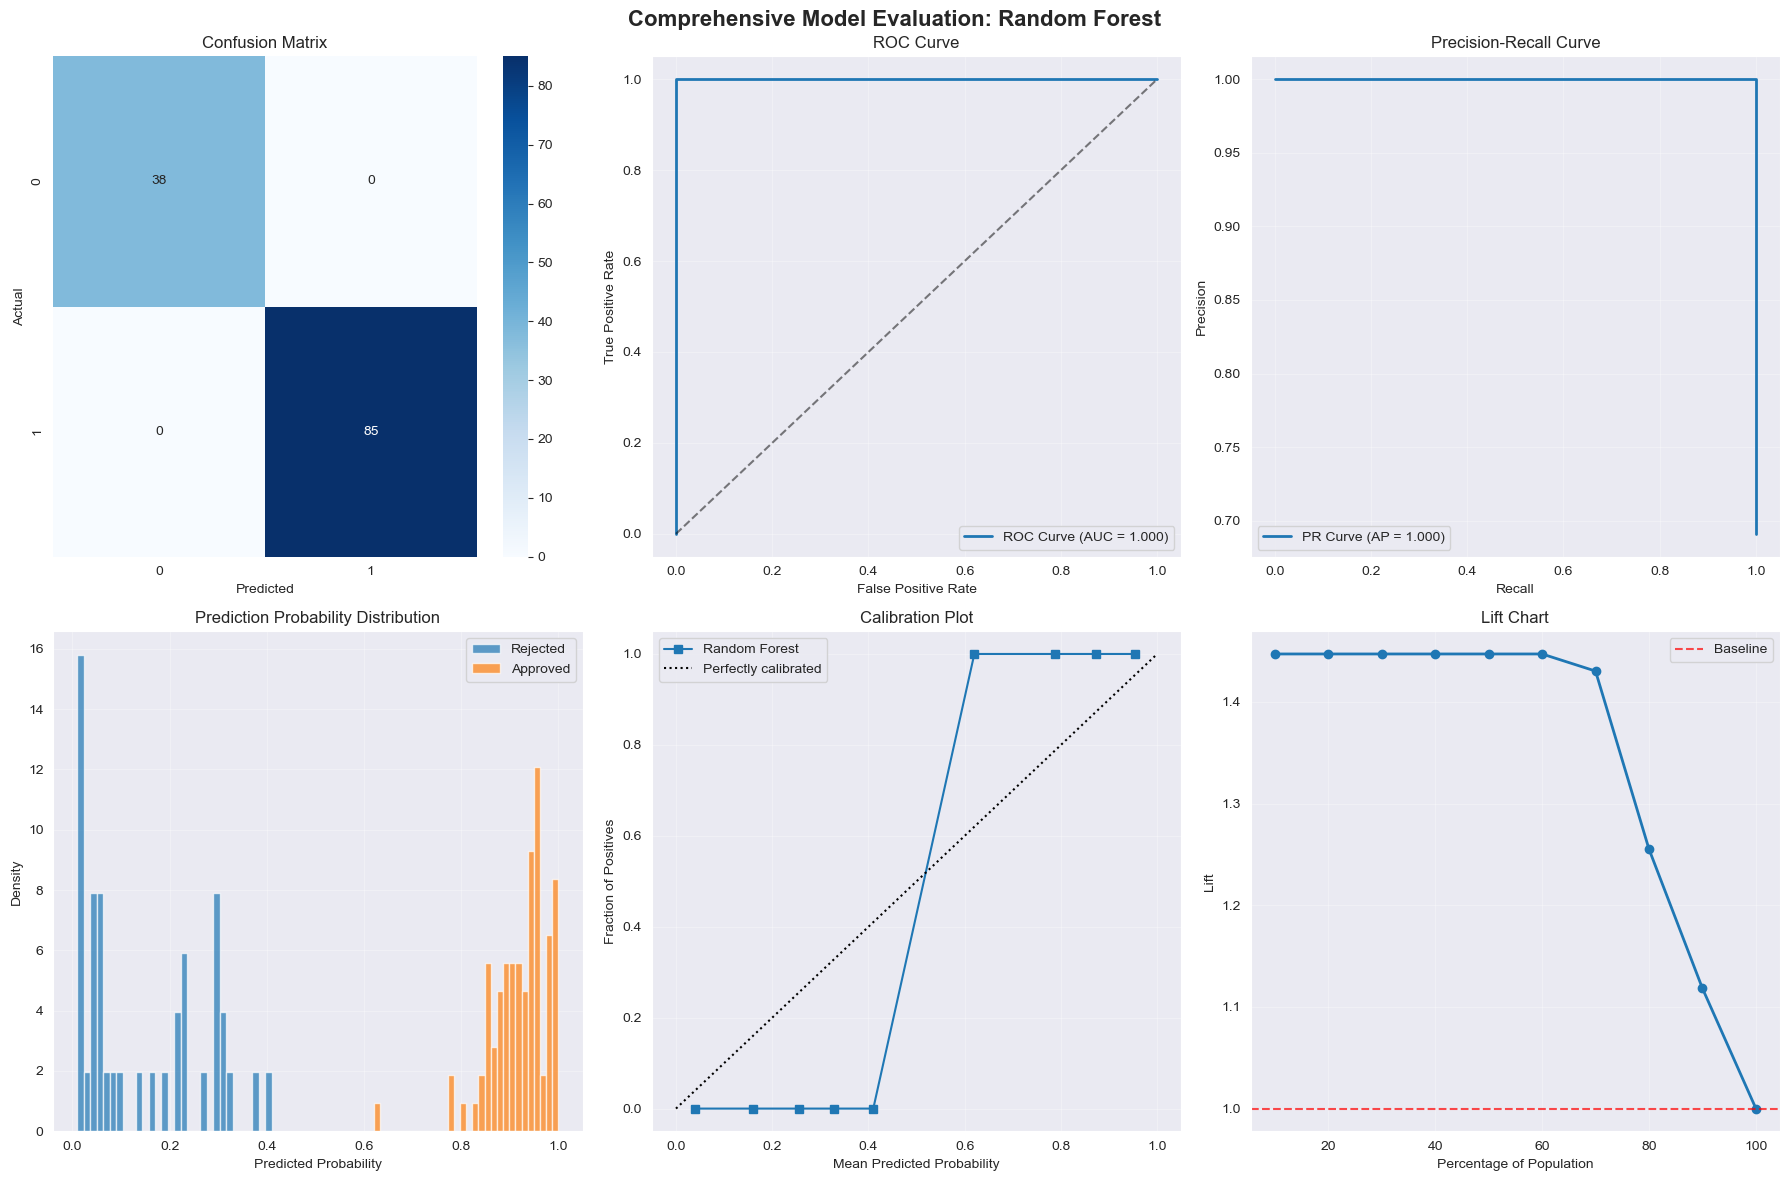

In [12]:
from GoodnessOfFit import GoodnessOfFit

gof = GoodnessOfFit(ml_pipeline)

# Evaluate a specific model
gof.evaluate_model('Random Forest')
gof.display_metrics_summary('Random Forest')

# Create comprehensive visualizations
gof.plot_comprehensive_evaluation('Random Forest')

COMPREHENSIVE GOODNESS OF FIT ANALYSIS - ALL MODELS

Found 6 models: Logistic Regression, Random Forest, Gradient Boosting, SVM, Naive Bayes, Random Forest_Tuned

Running comprehensive analysis for each model...

ANALYZING MODEL 1/6: Logistic Regression

🔍 Step 1: Basic Metrics Evaluation

📊 Step 2: Detailed Metrics Summary
GOODNESS OF FIT EVALUATION: Logistic Regression

📊 CORE CLASSIFICATION METRICS
----------------------------------------
Accuracy:           0.8618
Precision:          0.8760
Recall:             0.8618
F1-Score:           0.8504

📈 CONFUSION MATRIX METRICS
----------------------------------------
True Positives:     84
True Negatives:     22
False Positives:    16
False Negatives:    1
Sensitivity (TPR):  0.9882
Specificity (TNR):  0.5789

🎯 ADVANCED METRICS
----------------------------------------
ROC AUC:            0.8399
Average Precision:  0.9008
Matthews Coeff:     0.6721
Cohen's Kappa:      0.6367

📊 PROBABILISTIC METRICS
--------------------------------------

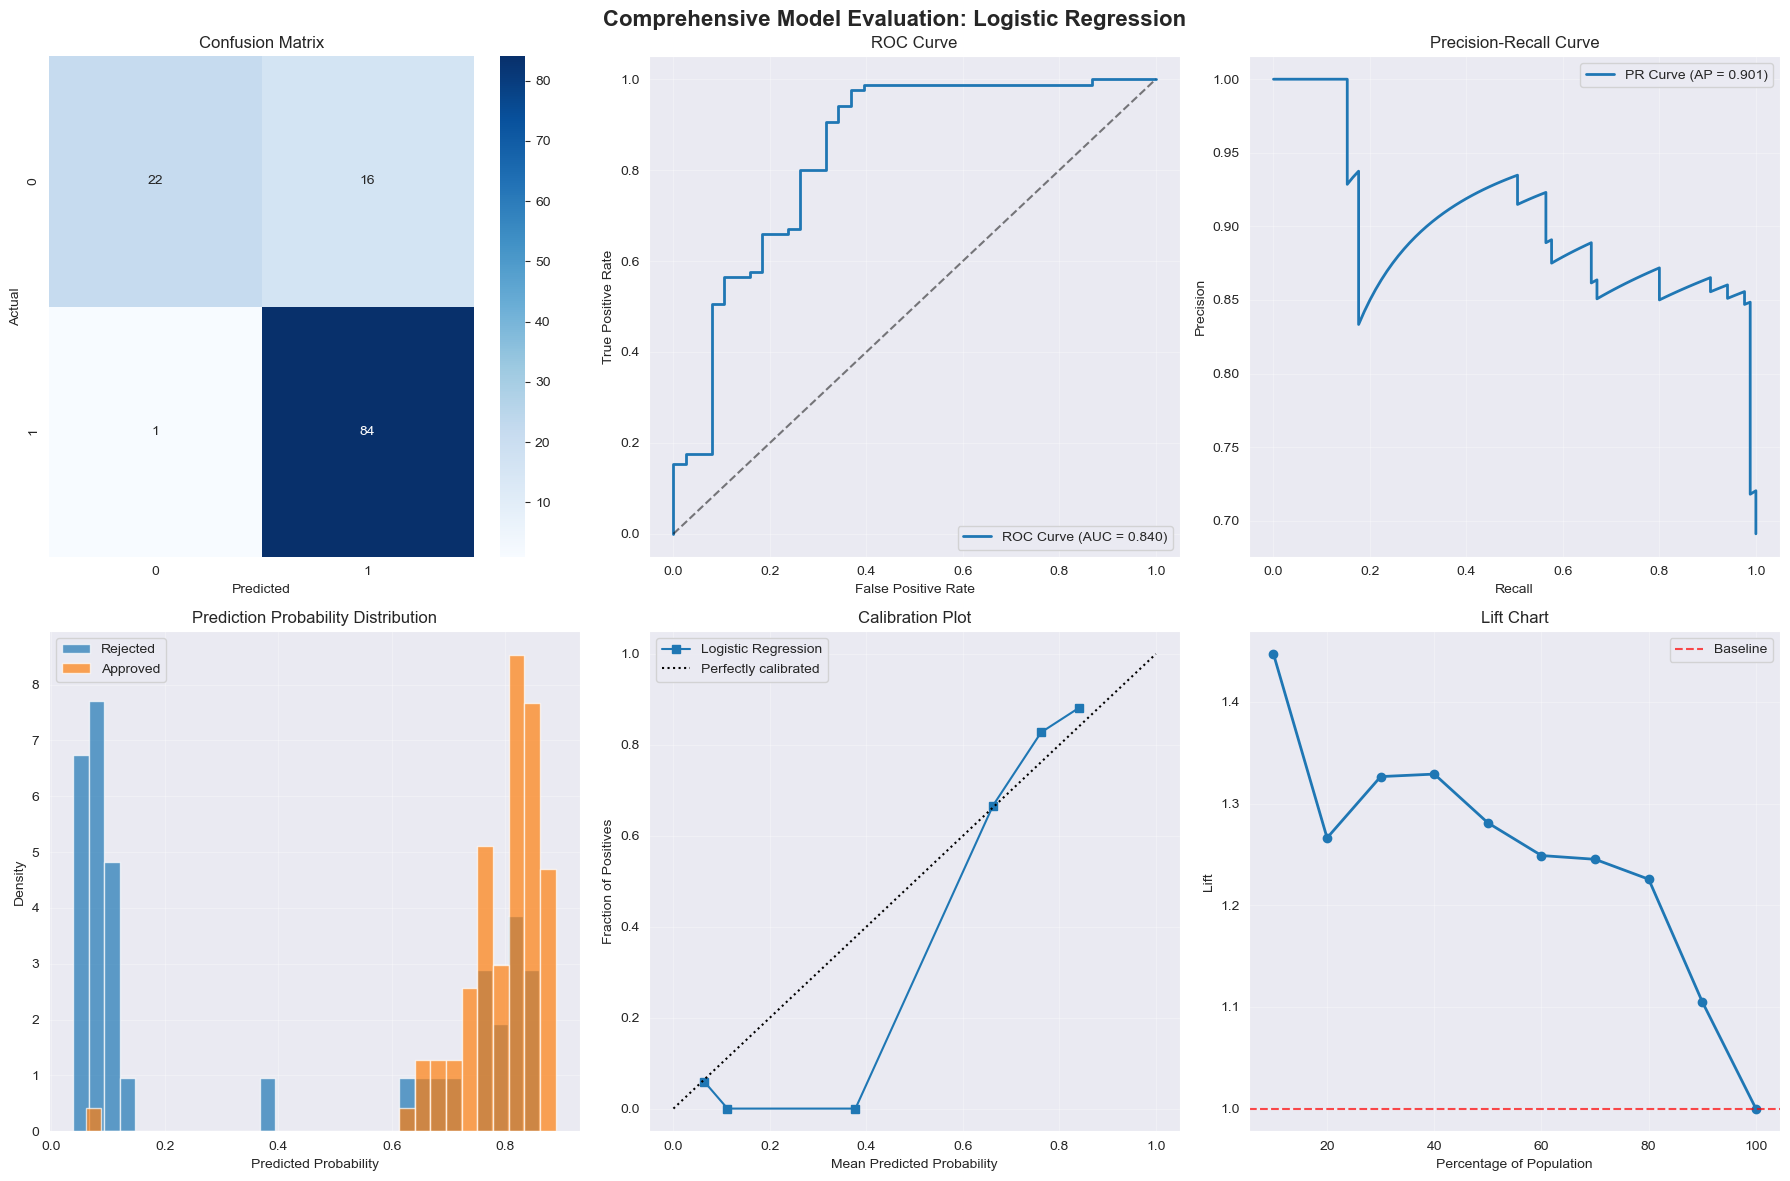


✅ Completed analysis for Logistic Regression

ANALYZING MODEL 2/6: Random Forest

🔍 Step 1: Basic Metrics Evaluation

📊 Step 2: Detailed Metrics Summary
GOODNESS OF FIT EVALUATION: Random Forest

📊 CORE CLASSIFICATION METRICS
----------------------------------------
Accuracy:           1.0000
Precision:          1.0000
Recall:             1.0000
F1-Score:           1.0000

📈 CONFUSION MATRIX METRICS
----------------------------------------
True Positives:     85
True Negatives:     38
False Positives:    0
False Negatives:    0
Sensitivity (TPR):  1.0000
Specificity (TNR):  1.0000

🎯 ADVANCED METRICS
----------------------------------------
ROC AUC:            1.0000
Average Precision:  1.0000
Matthews Coeff:     1.0000
Cohen's Kappa:      1.0000

📊 PROBABILISTIC METRICS
----------------------------------------
Log Loss:           0.1123
Brier Score:        0.0184

💼 BUSINESS METRICS
----------------------------------------
Lift (Top 10%):     1.4471

🔬 Step 3: Comprehensive Error Ana

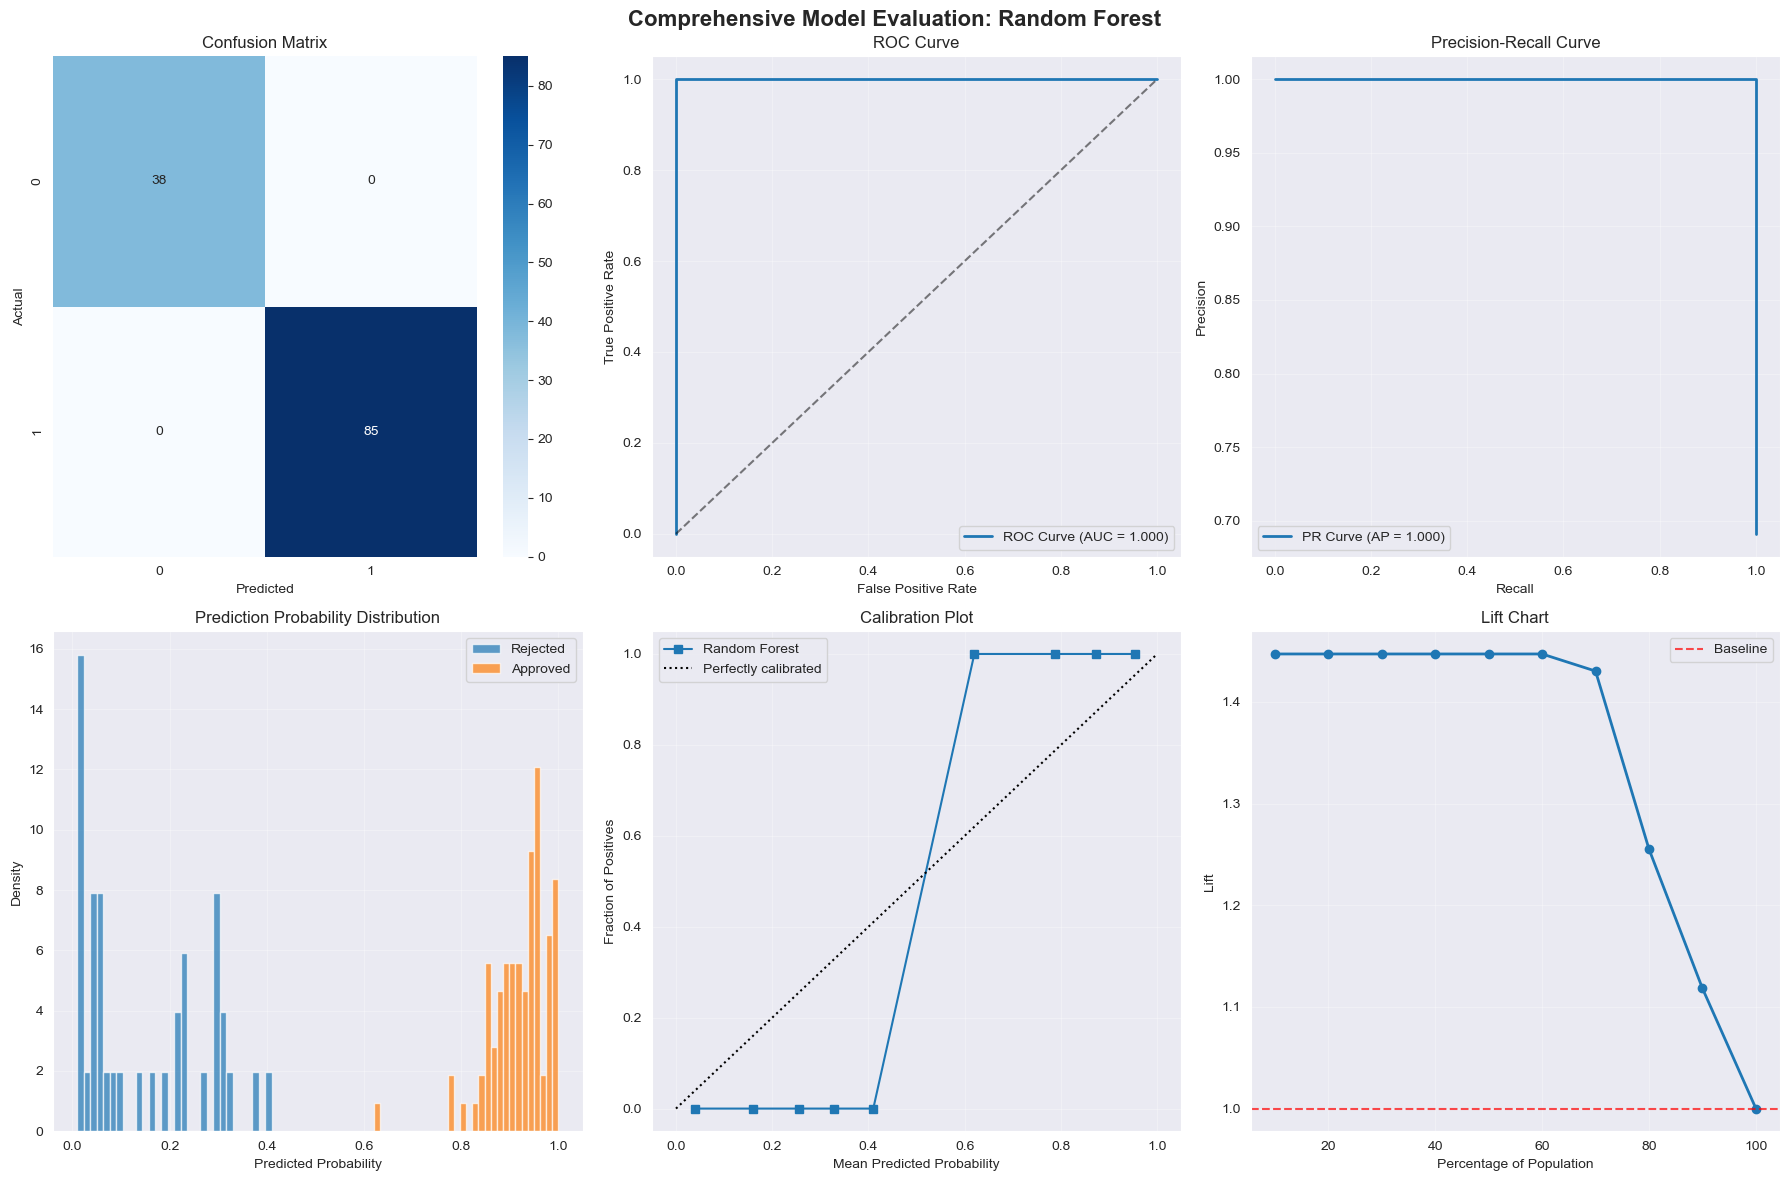


✅ Completed analysis for Random Forest

ANALYZING MODEL 3/6: Gradient Boosting

🔍 Step 1: Basic Metrics Evaluation

📊 Step 2: Detailed Metrics Summary
GOODNESS OF FIT EVALUATION: Gradient Boosting

📊 CORE CLASSIFICATION METRICS
----------------------------------------
Accuracy:           0.9187
Precision:          0.9273
Recall:             0.9187
F1-Score:           0.9148

📈 CONFUSION MATRIX METRICS
----------------------------------------
True Positives:     85
True Negatives:     28
False Positives:    10
False Negatives:    0
Sensitivity (TPR):  1.0000
Specificity (TNR):  0.7368

🎯 ADVANCED METRICS
----------------------------------------
ROC AUC:            0.9752
Average Precision:  0.9812
Matthews Coeff:     0.8120
Cohen's Kappa:      0.7947

📊 PROBABILISTIC METRICS
----------------------------------------
Log Loss:           0.2427
Brier Score:        0.0629

💼 BUSINESS METRICS
----------------------------------------
Lift (Top 10%):     1.4471

🔬 Step 3: Comprehensive Error 

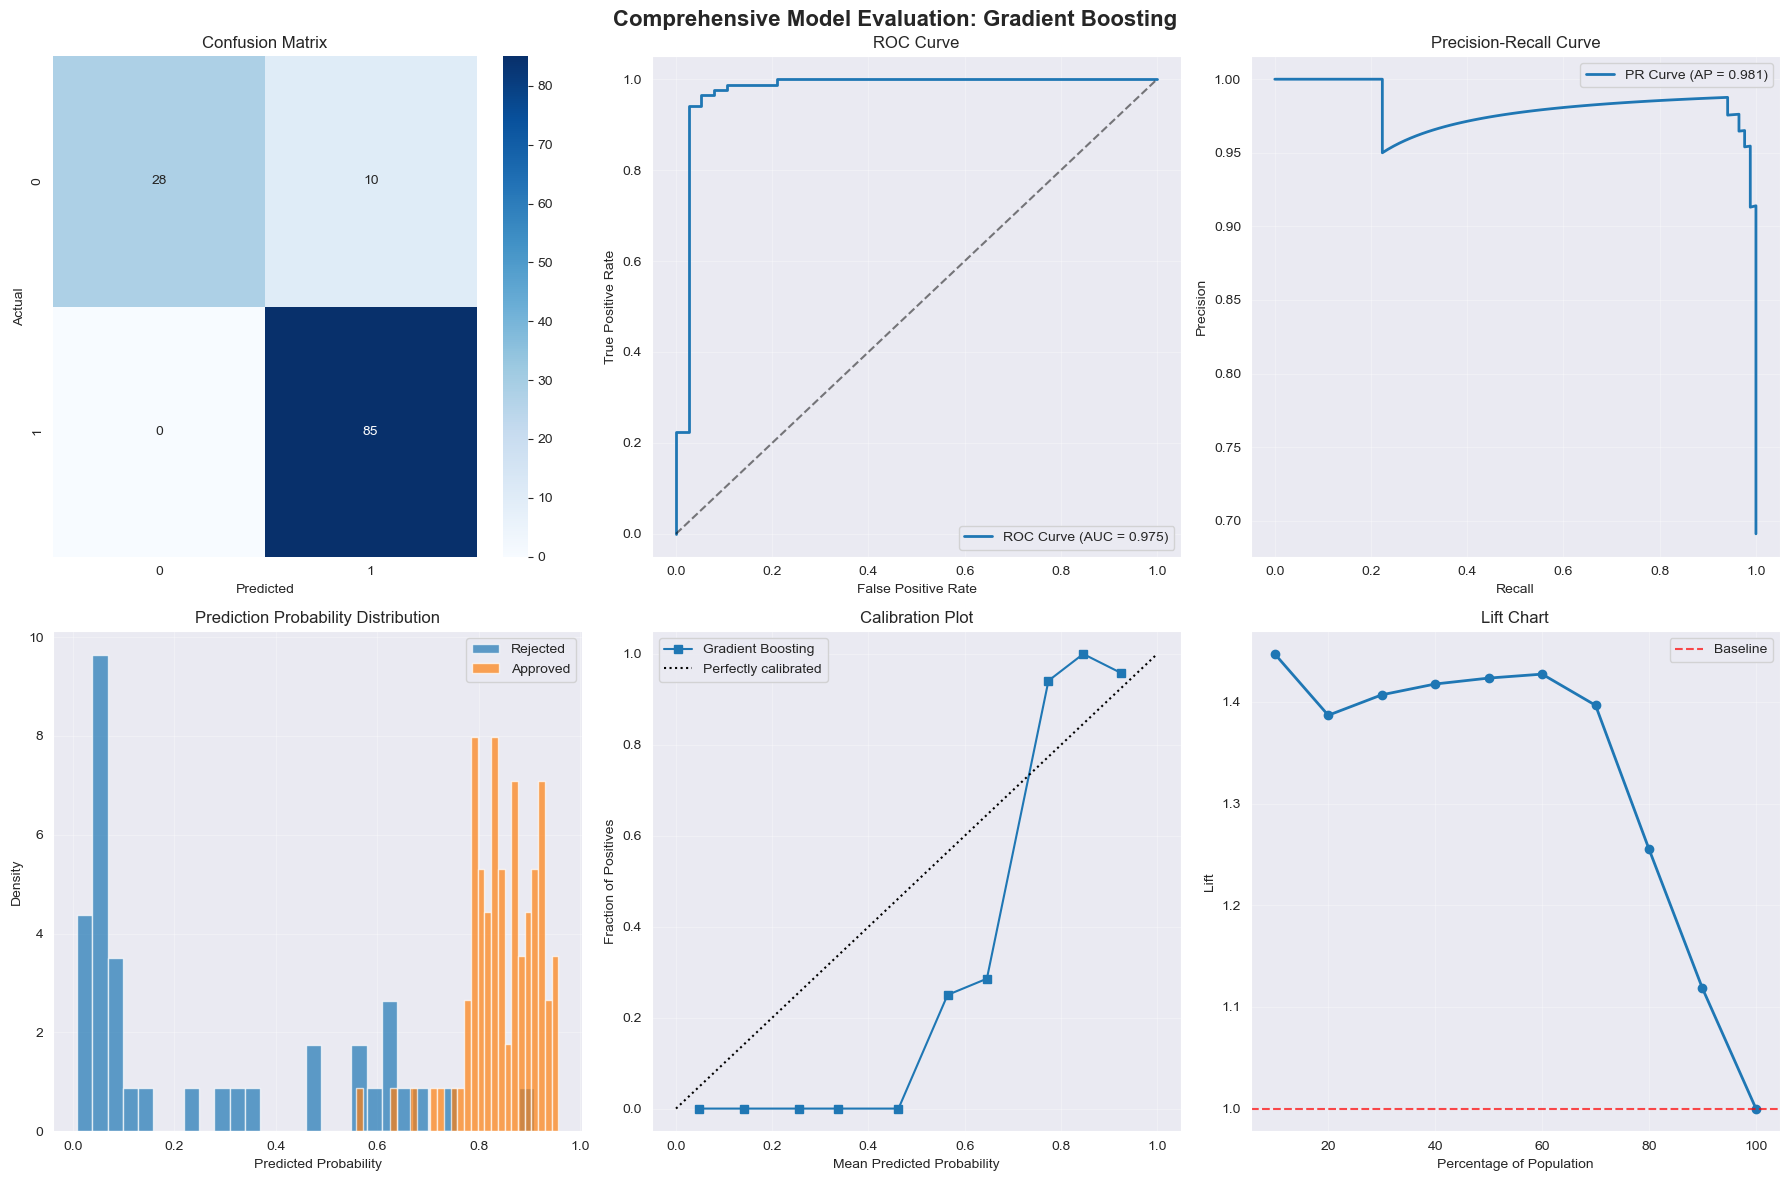


✅ Completed analysis for Gradient Boosting

ANALYZING MODEL 4/6: SVM

🔍 Step 1: Basic Metrics Evaluation

📊 Step 2: Detailed Metrics Summary
GOODNESS OF FIT EVALUATION: SVM

📊 CORE CLASSIFICATION METRICS
----------------------------------------
Accuracy:           0.8618
Precision:          0.8760
Recall:             0.8618
F1-Score:           0.8504

📈 CONFUSION MATRIX METRICS
----------------------------------------
True Positives:     84
True Negatives:     22
False Positives:    16
False Negatives:    1
Sensitivity (TPR):  0.9882
Specificity (TNR):  0.5789

🎯 ADVANCED METRICS
----------------------------------------
ROC AUC:            0.9006
Average Precision:  0.9399
Matthews Coeff:     0.6721
Cohen's Kappa:      0.6367

📊 PROBABILISTIC METRICS
----------------------------------------
Log Loss:           0.3723
Brier Score:        0.1096

💼 BUSINESS METRICS
----------------------------------------
Lift (Top 10%):     1.4471

🔬 Step 3: Comprehensive Error Analysis
COMPREHENSIVE E

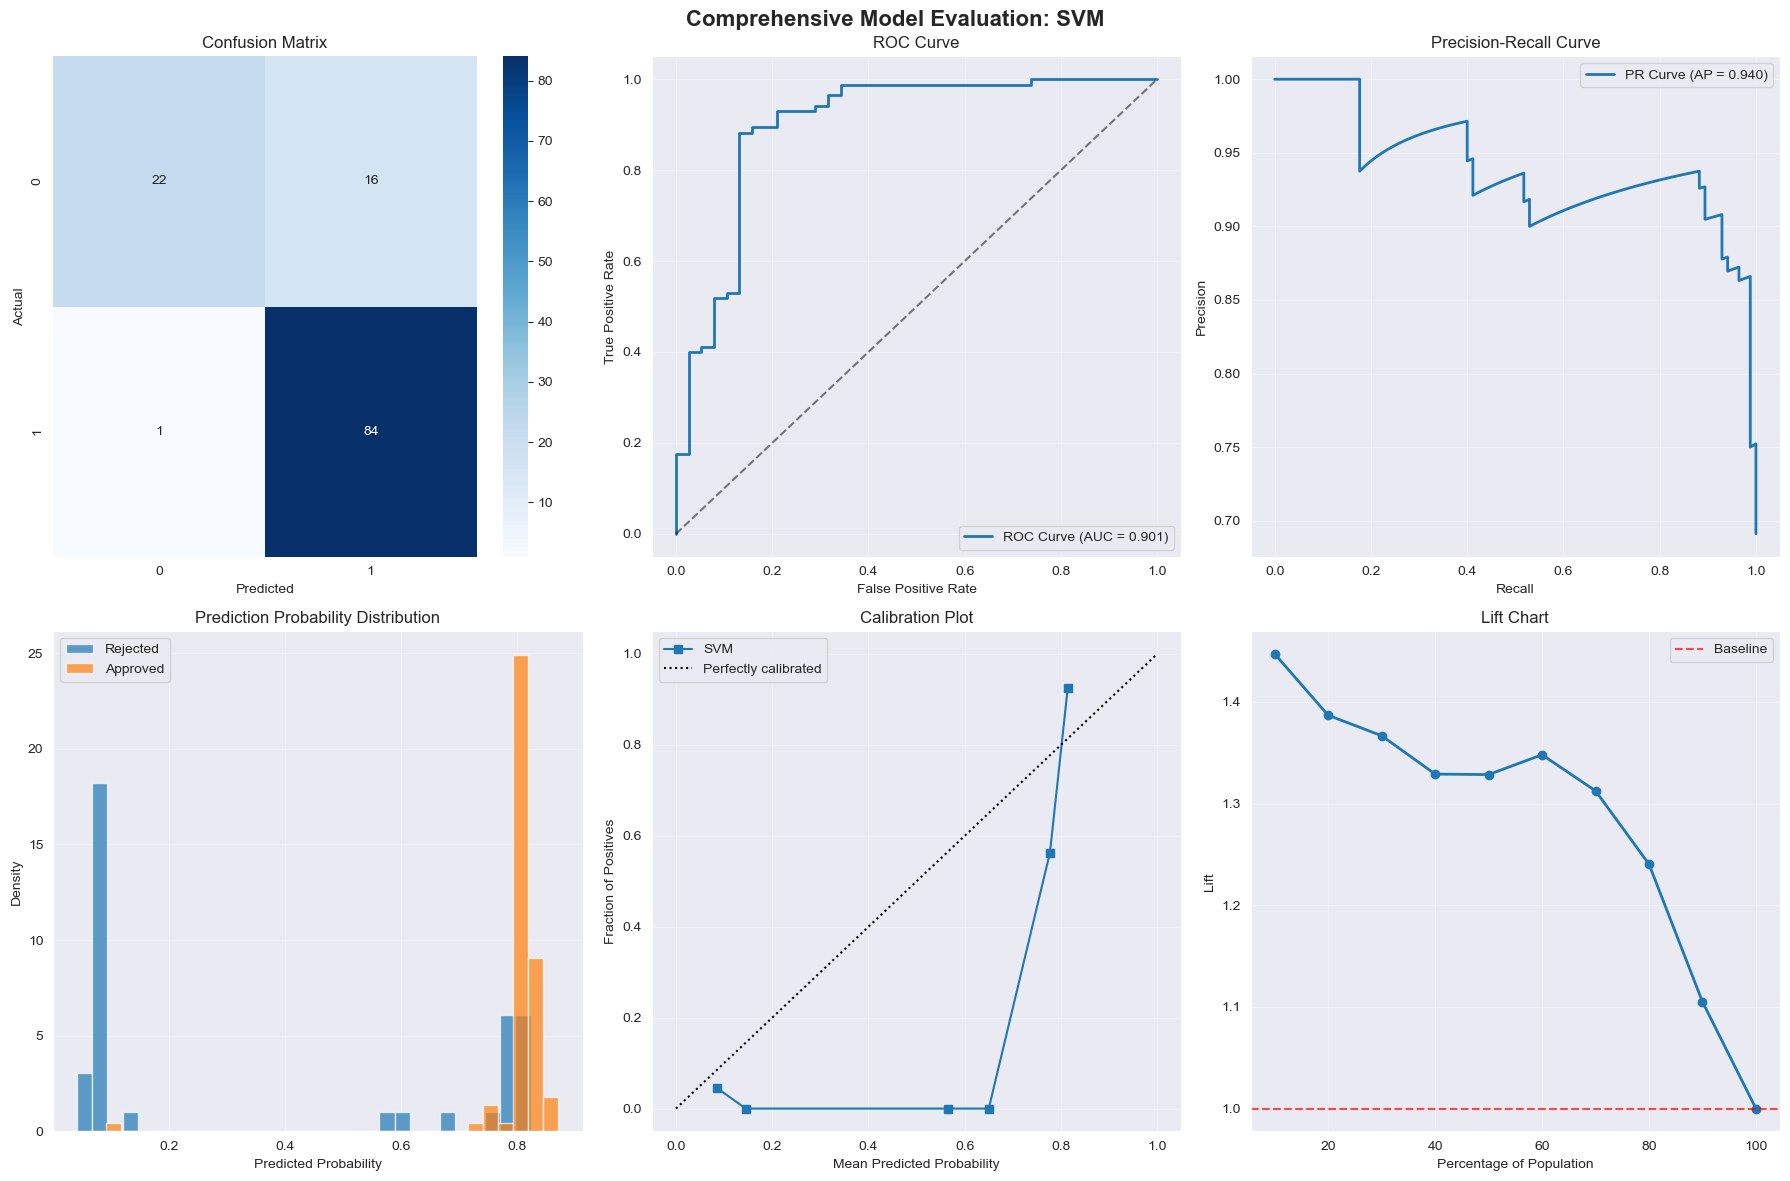


✅ Completed analysis for SVM

ANALYZING MODEL 5/6: Naive Bayes

🔍 Step 1: Basic Metrics Evaluation

📊 Step 2: Detailed Metrics Summary
GOODNESS OF FIT EVALUATION: Naive Bayes

📊 CORE CLASSIFICATION METRICS
----------------------------------------
Accuracy:           0.8455
Precision:          0.8501
Recall:             0.8455
F1-Score:           0.8351

📈 CONFUSION MATRIX METRICS
----------------------------------------
True Positives:     82
True Negatives:     22
False Positives:    16
False Negatives:    3
Sensitivity (TPR):  0.9647
Specificity (TNR):  0.5789

🎯 ADVANCED METRICS
----------------------------------------
ROC AUC:            0.8146
Average Precision:  0.8818
Matthews Coeff:     0.6242
Cohen's Kappa:      0.6004

📊 PROBABILISTIC METRICS
----------------------------------------
Log Loss:           0.6918
Brier Score:        0.1400

💼 BUSINESS METRICS
----------------------------------------
Lift (Top 10%):     1.3265

🔬 Step 3: Comprehensive Error Analysis
COMPREHENSIVE

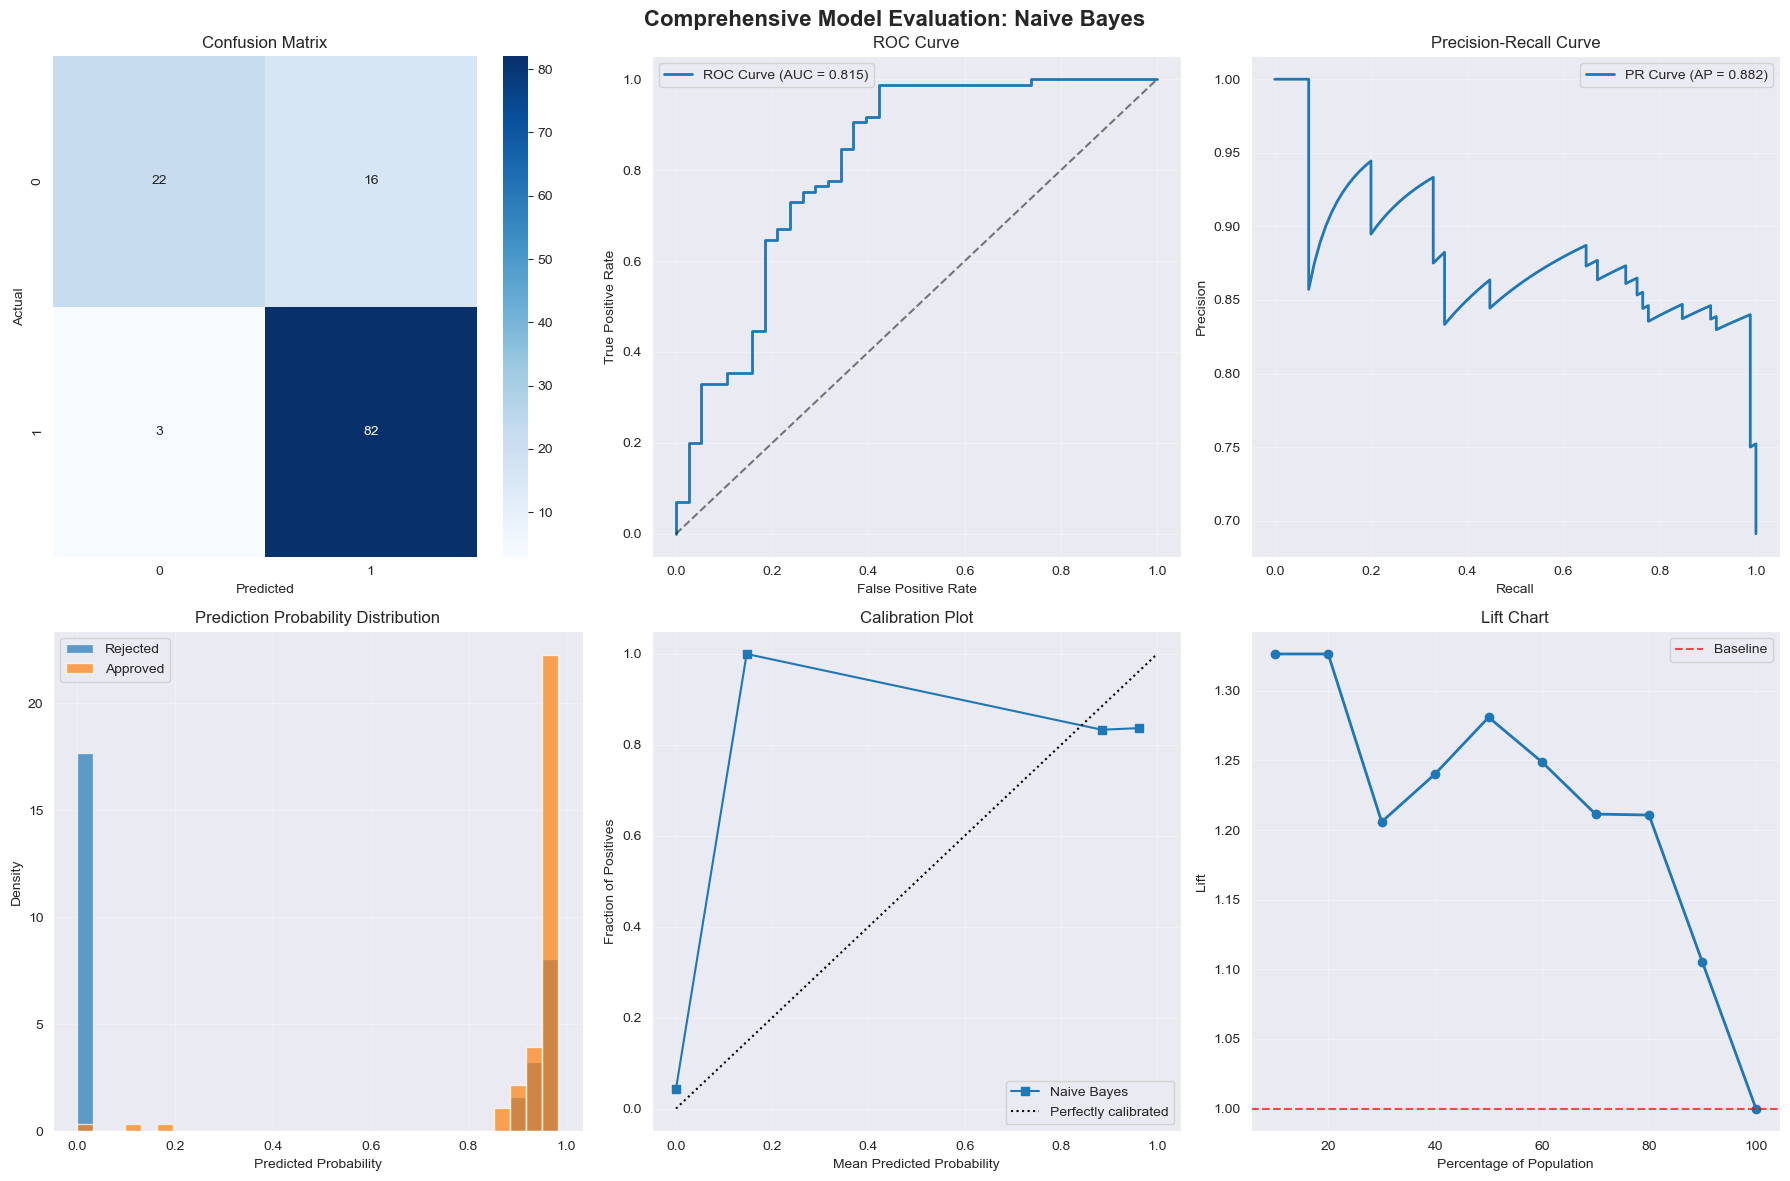


✅ Completed analysis for Naive Bayes

ANALYZING MODEL 6/6: Random Forest_Tuned

🔍 Step 1: Basic Metrics Evaluation

📊 Step 2: Detailed Metrics Summary
GOODNESS OF FIT EVALUATION: Random Forest_Tuned

📊 CORE CLASSIFICATION METRICS
----------------------------------------
Accuracy:           0.8862
Precision:          0.8955
Recall:             0.8862
F1-Score:           0.8793

📈 CONFUSION MATRIX METRICS
----------------------------------------
True Positives:     84
True Negatives:     25
False Positives:    13
False Negatives:    1
Sensitivity (TPR):  0.9882
Specificity (TNR):  0.6579

🎯 ADVANCED METRICS
----------------------------------------
ROC AUC:            0.9659
Average Precision:  0.9841
Matthews Coeff:     0.7312
Cohen's Kappa:      0.7079

📊 PROBABILISTIC METRICS
----------------------------------------
Log Loss:           0.3096
Brier Score:        0.0879

💼 BUSINESS METRICS
----------------------------------------
Lift (Top 10%):     1.4471

🔬 Step 3: Comprehensive Erro

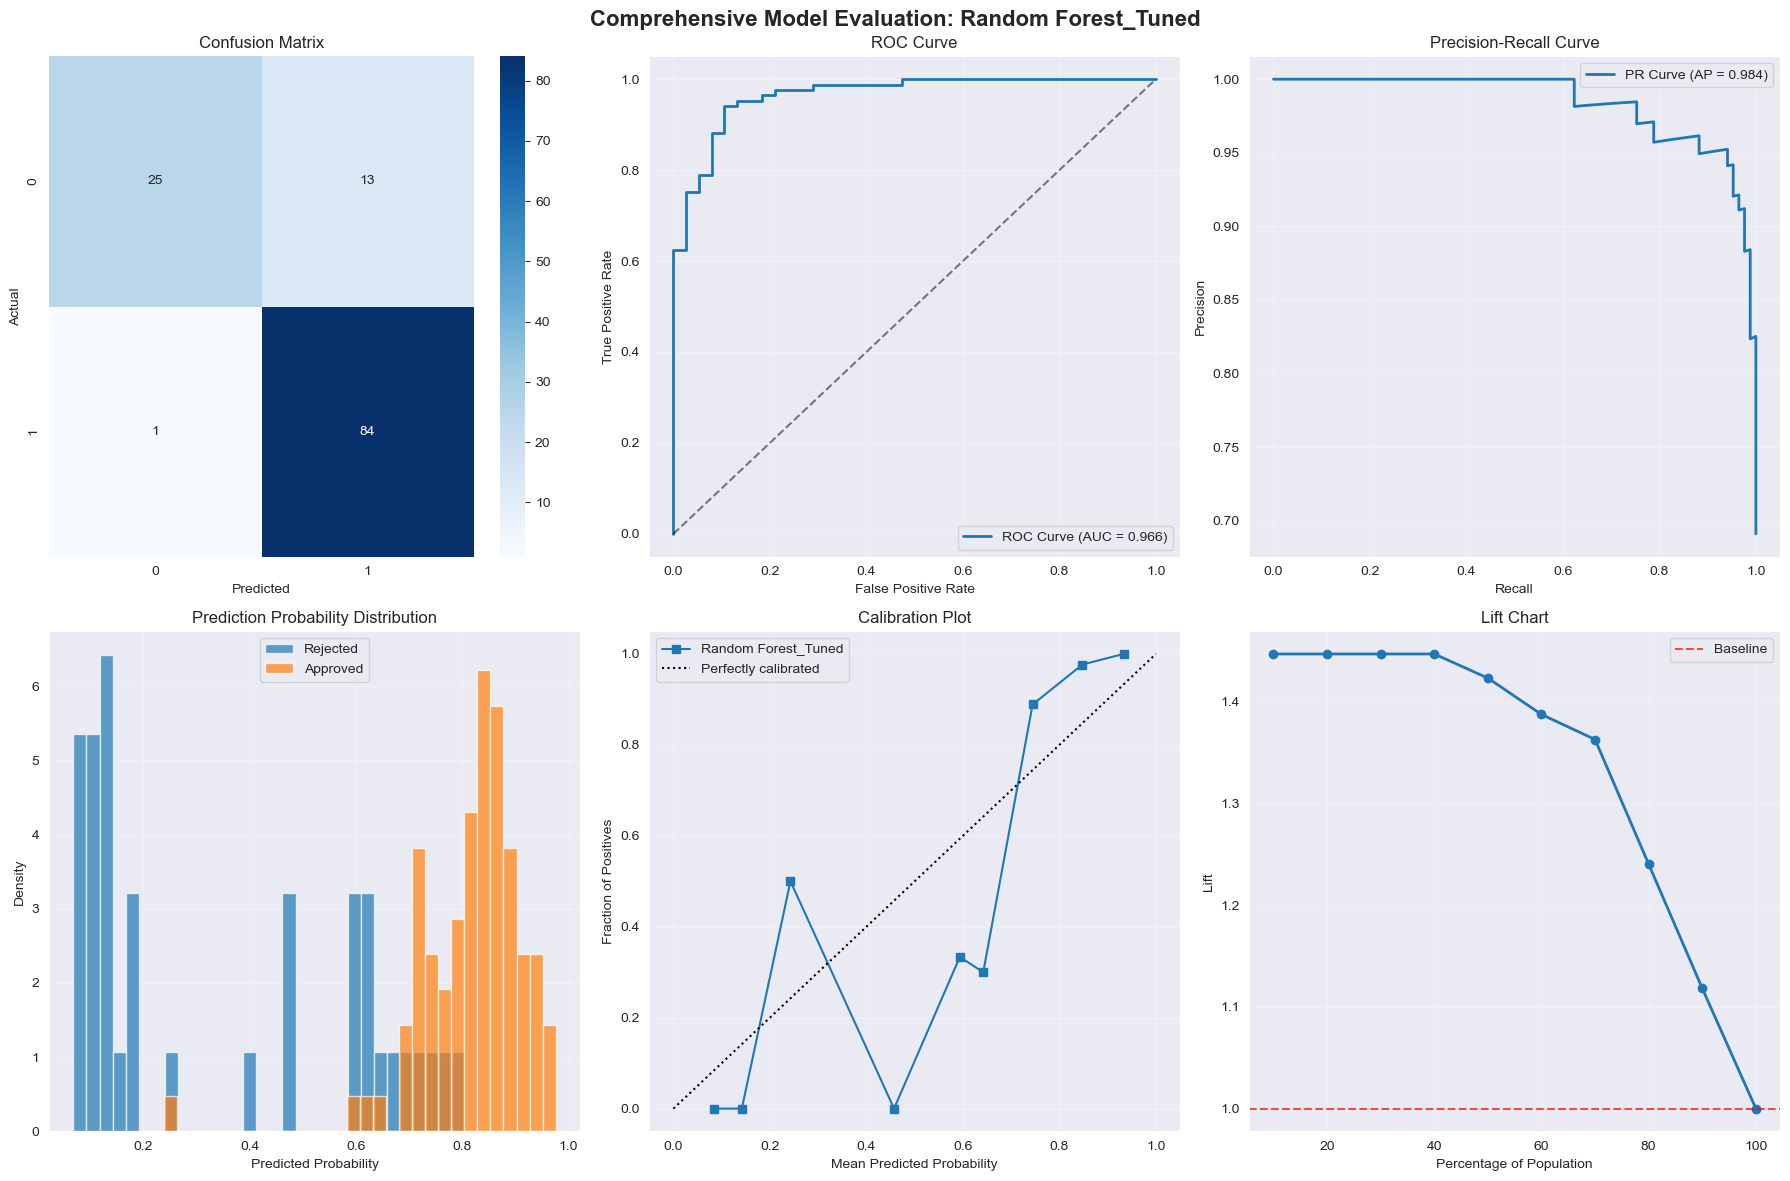


✅ Completed analysis for Random Forest_Tuned

FINAL MODEL COMPARISON & RECOMMENDATIONS

🏆 OVERALL MODEL COMPARISON:
MODEL COMPARISON - GOODNESS OF FIT
              Model  accuracy  precision  recall  f1_score  roc_auc  matthews_corrcoef  lift_top_decile
      Random Forest    1.0000     1.0000  1.0000    1.0000   1.0000             1.0000           1.4471
  Gradient Boosting    0.9187     0.9273  0.9187    0.9148   0.9752             0.8120           1.4471
Random Forest_Tuned    0.8862     0.8955  0.8862    0.8793   0.9659             0.7312           1.4471
                SVM    0.8618     0.8760  0.8618    0.8504   0.9006             0.6721           1.4471
Logistic Regression    0.8618     0.8760  0.8618    0.8504   0.8399             0.6721           1.4471
        Naive Bayes    0.8455     0.8501  0.8455    0.8351   0.8146             0.6242           1.3265


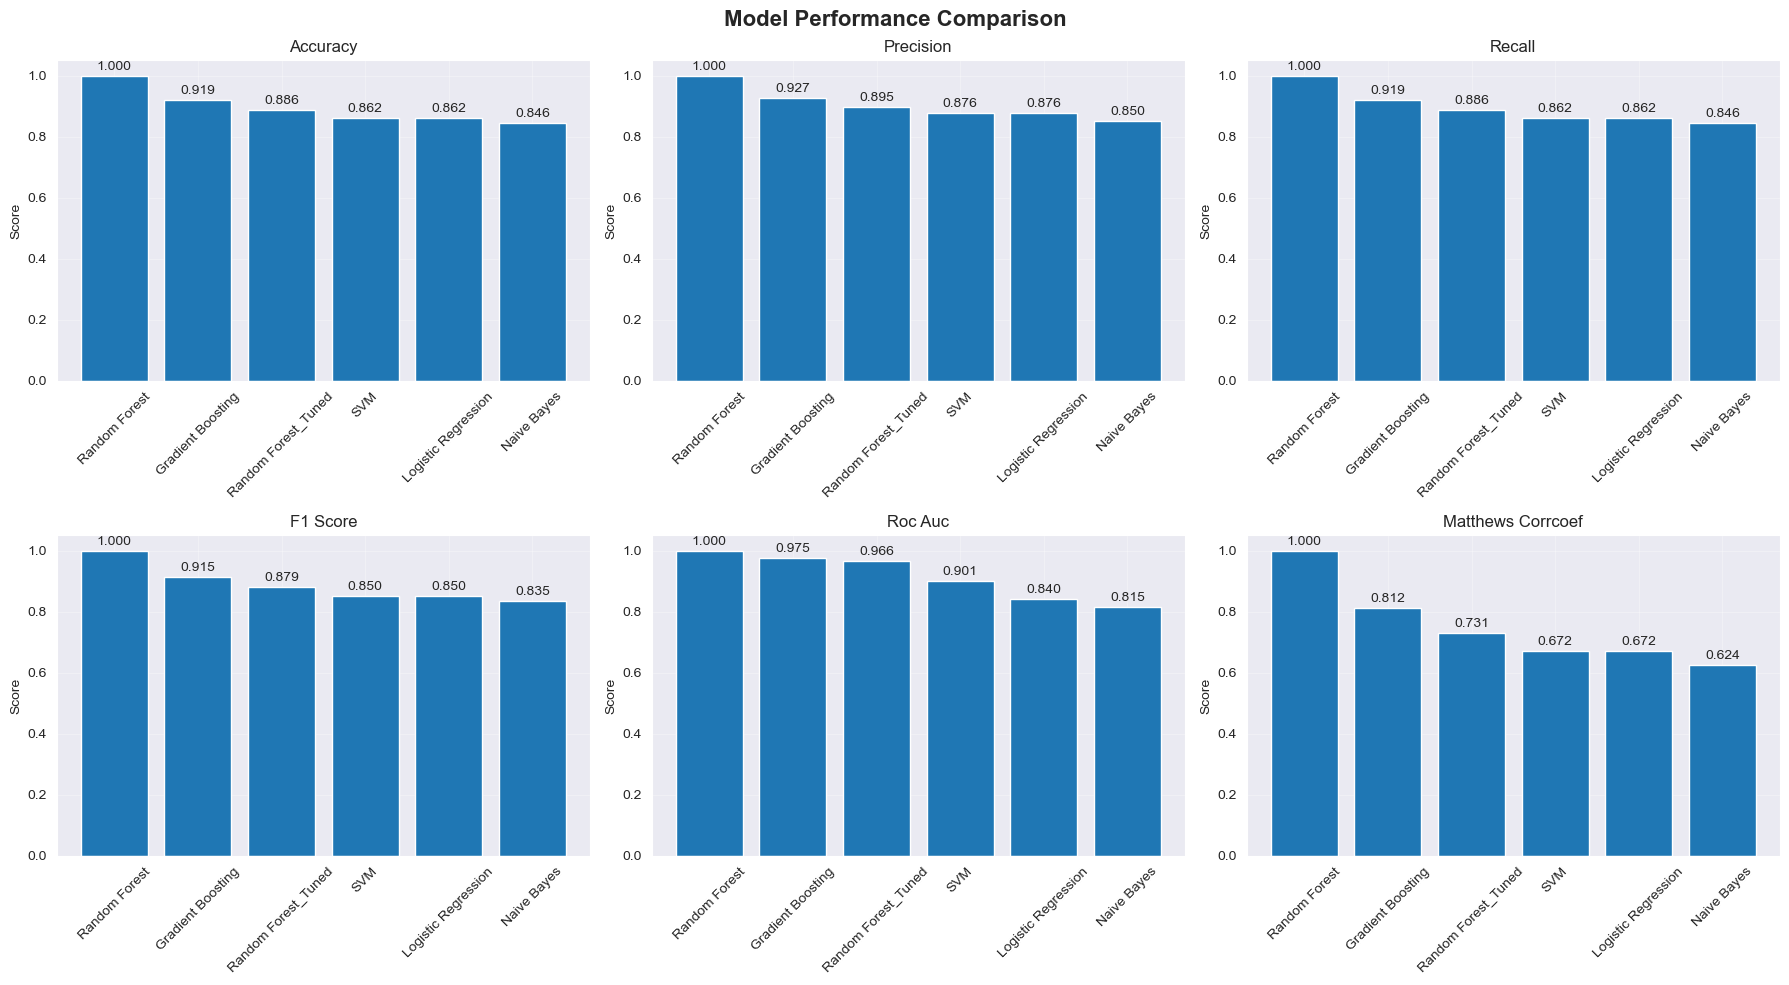


🎯 MODEL RECOMMENDATION:
--------------------------------------------------
🥇 BEST OVERALL: Random Forest
   ROC AUC: 1.0000
   Accuracy: 1.0000
   F1-Score: 1.0000

🥈 RUNNER-UP: Gradient Boosting
   ROC AUC: 0.9752

🥉 THIRD PLACE: Random Forest_Tuned
   ROC AUC: 0.9659

💡 DEPLOYMENT RECOMMENDATION:
   → Deploy: Random Forest

💼 BUSINESS CONSIDERATIONS:
   False Positive Rate: 0.000 (Risk: Approving bad loans)
   False Negative Rate: 0.000 (Risk: Rejecting good loans)

📋 EXECUTIVE SUMMARY REPORT:
✅ Successfully analyzed: 6 models

📊 PERFORMANCE STATISTICS:
   Best Accuracy:     1.0000
   Worst Accuracy:    0.8455
   Best ROC AUC:      1.0000
   Worst ROC AUC:     0.8146
   Best F1-Score:     1.0000
   Performance Range: 0.1854

🔍 ERROR ANALYSIS INSIGHTS:
   Models with predictable errors: 5/6
   Models with overconfident errors: 5/6

🎯 KEY RECOMMENDATIONS:
   1. Use Random Forest for production
   2. Implement prediction confidence thresholds
   3. Monitor weak segments identified in e

In [13]:
# Initialize goodness of fit evaluator
gof = GoodnessOfFit(ml_pipeline)

# Run comprehensive analysis for ALL models at once
all_results = gof.comprehensive_analysis_all_models(verbose=True, generate_plots=True)